# 1. Setting up the platform

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
## Reading and combining all the datapoints for different years into a single Pandas DataFrame

## Adding a column "Year" to contain the year of the datapoints

database_yearwise = []
total_entries = 0

for year in np.arange(2011,2016):
    filepath = os.path.join("Dataset", "pp_gas_emission", "gt_") + str(year) + ".csv"
    dataframe = pd.read_csv(filepath)
    dataframe["Year"] = year
    database_yearwise.append(dataframe)
    total_entries += len(dataframe)

concatenated_database = pd.concat(database_yearwise)

if len(concatenated_database) == total_entries:
    print("Yearwise database combined successfully!!")
else:
    print("error occurred...")
    

Yearwise database combined successfully!!


In [3]:
concatenated_database.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   

        CO     NOX  Year  
0  0.32663  81.952  2011  
1  0.44784  82.377  2011  
2  0.45144  83.776  2011  
3  0.23107  82.505  2011  
4  0.26747  82.028  2011

In [4]:
## Splitting the dataset into training + validation and testing sets

df_tv = concatenated_database[concatenated_database.Year <= 2013]
df_test = concatenated_database[concatenated_database.Year > 2013]
df_tv = df_tv.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [5]:
# Creating a backup of training + validation set
df_tv_original = df_tv.copy()

In [6]:
df_tv.describe()

AT            AP            AH          AFDP          GTEP  \
count  22191.000000  22191.000000  22191.000000  22191.000000  22191.000000   
mean      17.712247   1012.812607     79.555224      4.037750     25.317873   
std        7.352789      6.396588     13.915018      0.810223      4.234147   
min        0.289850    985.850000     27.504000      2.087400     17.878000   
25%       11.664500   1008.800000     70.294500      3.449850     22.736000   
50%       17.739000   1012.400000     82.781000      4.068800     24.989000   
75%       23.657000   1016.700000     90.532000      4.451400     26.839000   
max       34.929000   1034.200000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  22191.000000  22191.000000  22191.000000  22191.000000  22191.000000   
mean    1083.080280    545.520170    133.537393     12.060208      2.214390   
std       16.840765      7.708708     16.026107      1.114265      2.295746   
min     1000.800000    512.450000    100.170000      9.875400      0.000388   
25%     1074.600000    542.600000    124.260000     11.395000      0.995375   
50%     1088.100000    549.900000    133.770000     12.001000      1.524200   
75%     1095.300000    550.050000    138.645000     12.443500      2.542400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX          Year  
count  22191.000000  22191.000000  
mean      68.776529   2011.988329  
std       11.036231      0.810031  
min       27.765000   2011.000000  
25%       61.548000   2011.000000  
50%       67.096000   2012.000000  
75%       74.572000   2013.000000  
max      119.910000   2013.000000

In [7]:
## Creating a function to save the image in the "Images" folder inside the project working folder

def fig_save(fig, name):
    original_path = "D:\\Study\\ML_and_Data_Science_2022\\ML in oil and gas projects\\IEW Projects\\Gas turbine"
    image_path = os.path.join(original_path ,"Images")
    os.makedirs(image_path, exist_ok=True)
    os.chdir(image_path)
    fig = fig
    plt.savefig(name)
    os.chdir(original_path)

## 1.1 Plotting Correlation Matrix

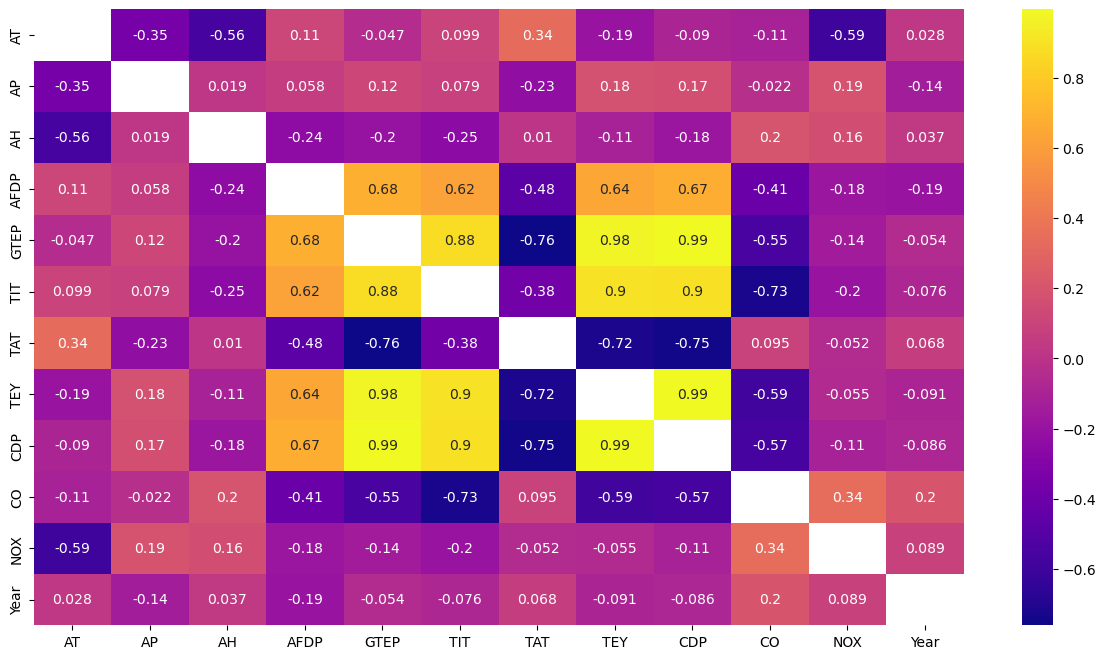

In [11]:
corr_matrix = df_tv.corr()
for i in range(len(corr_matrix)):
    corr_matrix.iloc[i,i] = np.NaN

import seaborn as sns
fig = plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, annot = True, cmap = "plasma", )

fig_save(fig, "Correlation Matrix")

In [12]:
features = list(df_tv.columns)
features = features[:-1]
features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

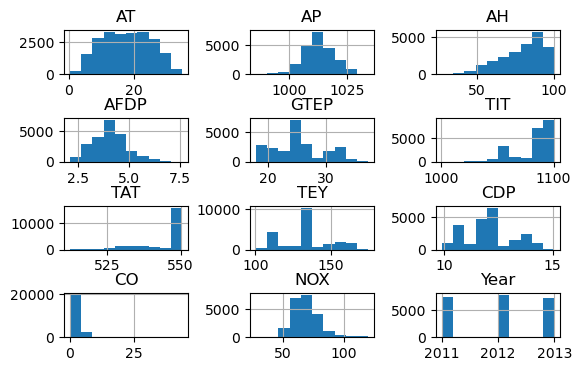

In [13]:
fig = df_tv.hist()
plt.subplots_adjust(top=0.75, hspace=1, wspace = 0.5)

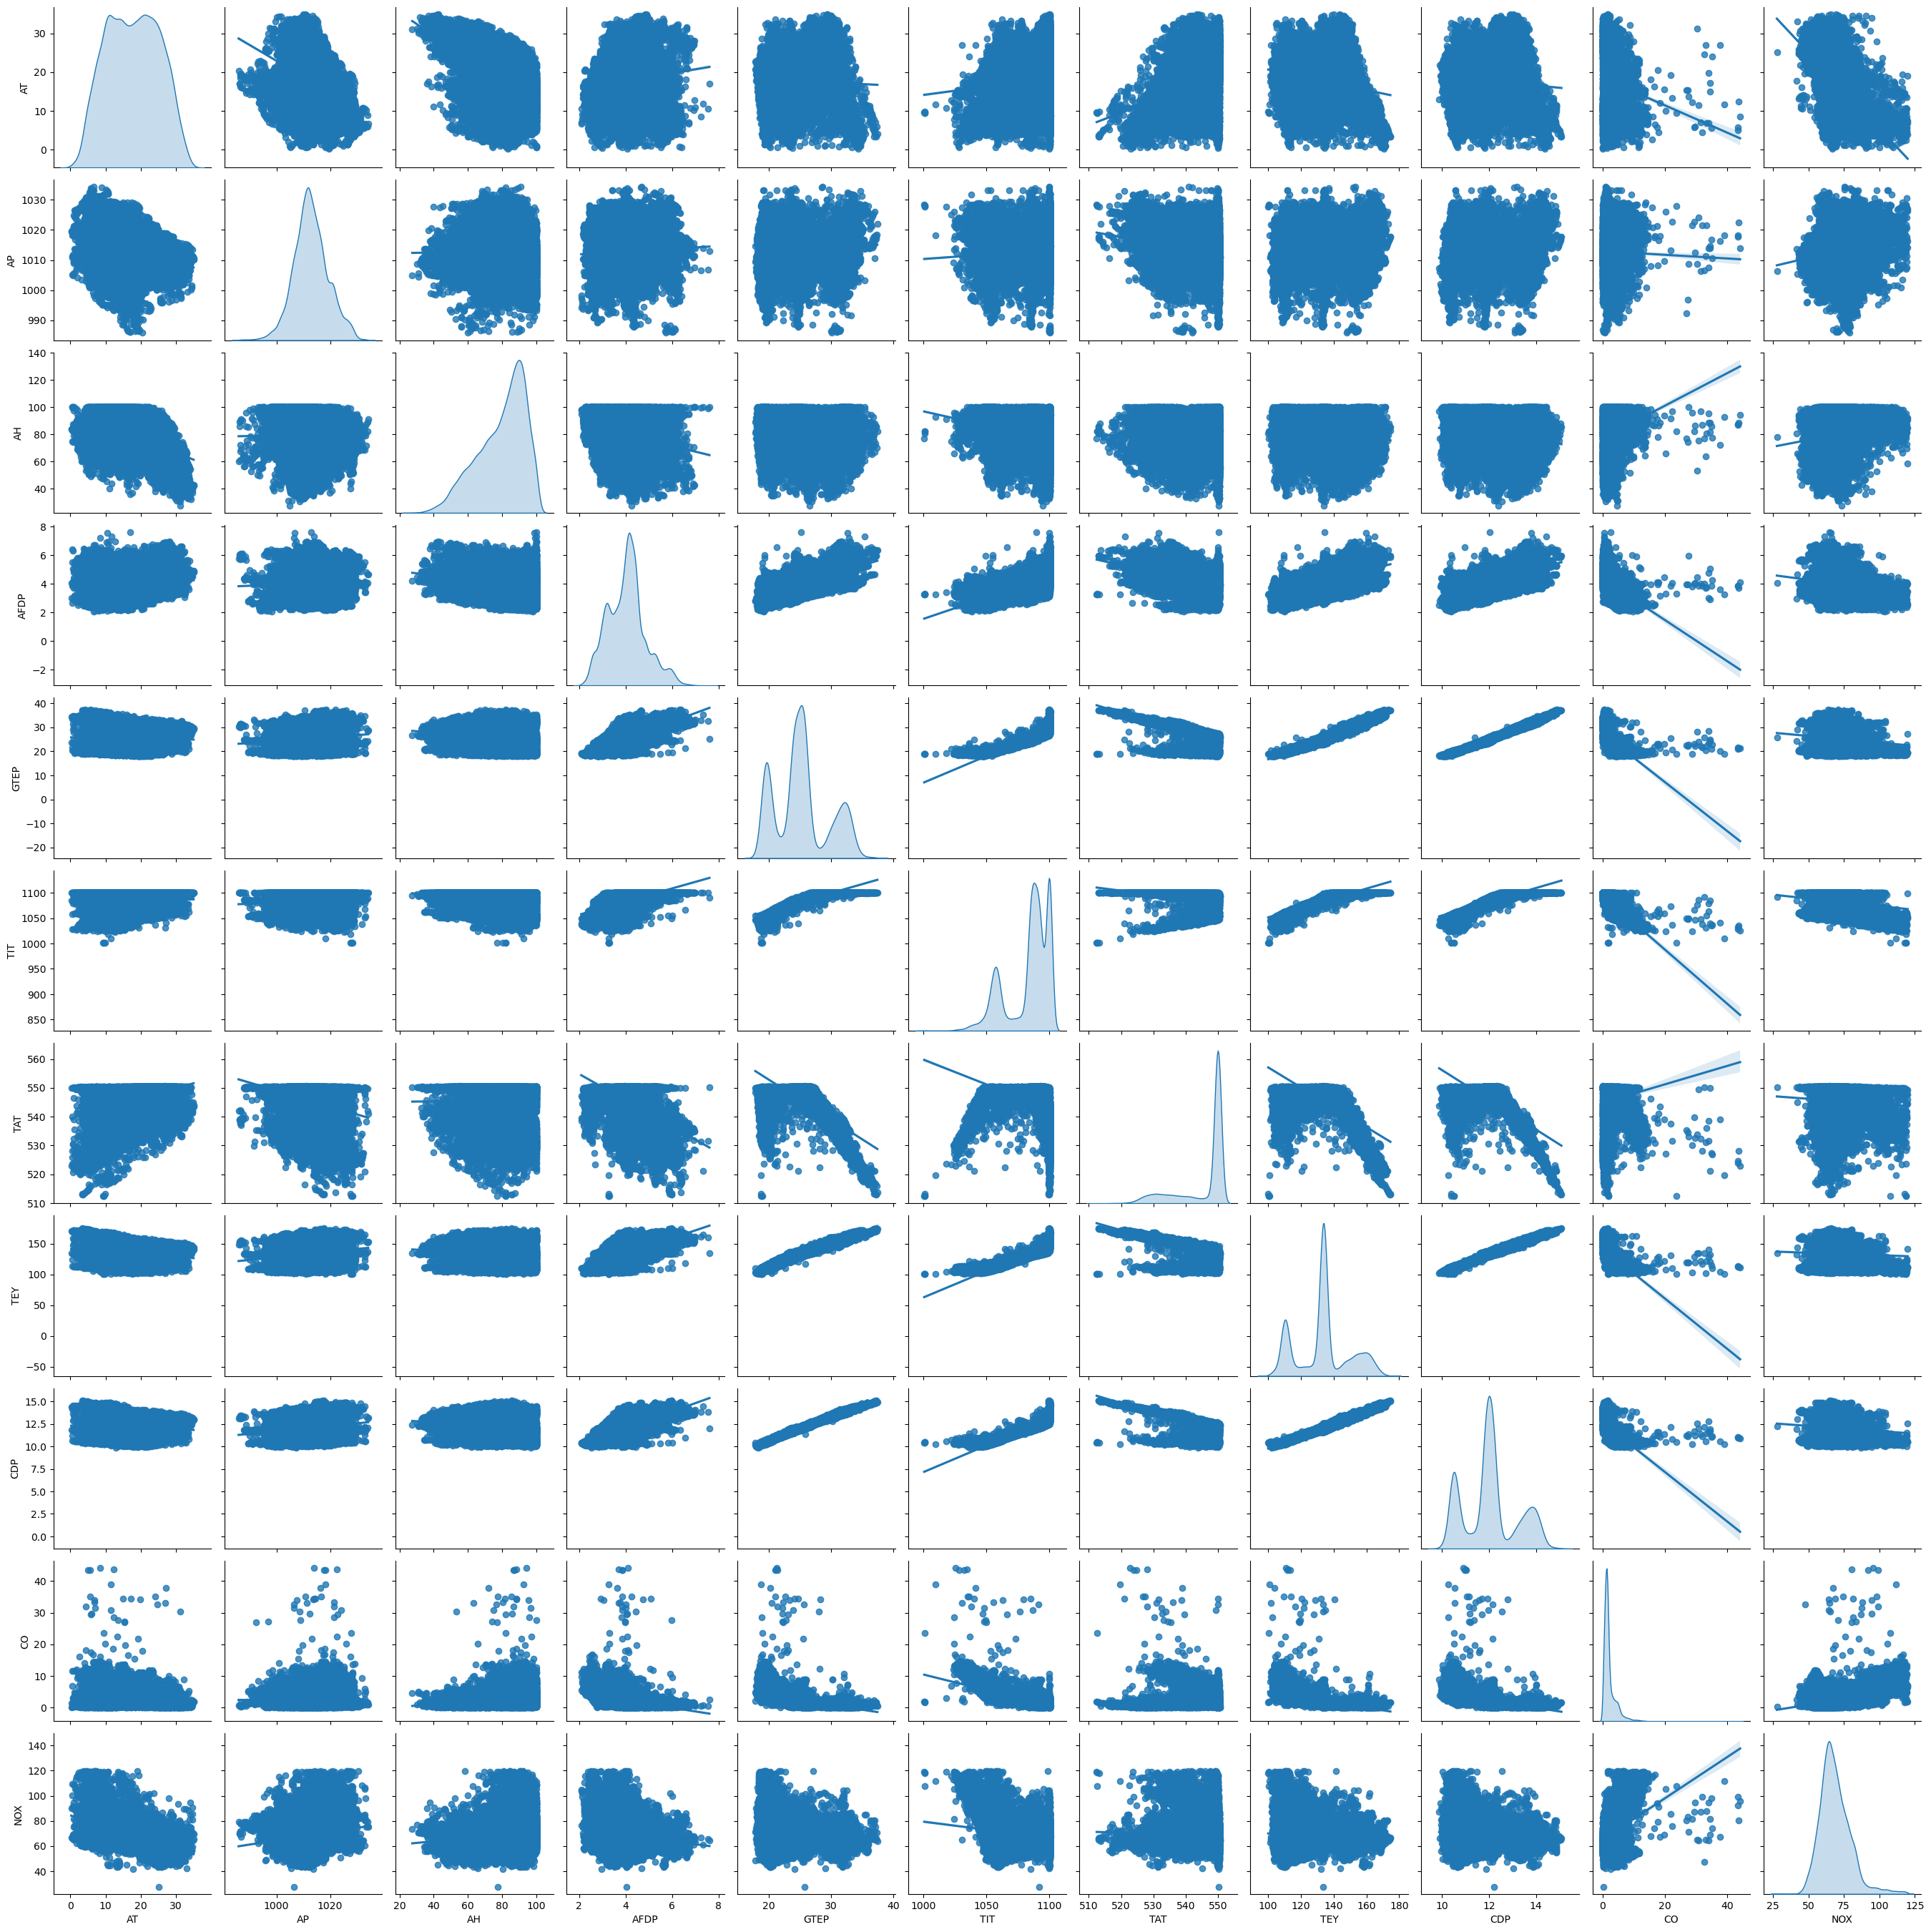

In [11]:
fig = sns.pairplot(df_tv[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']],
             kind='reg', diag_kind='kde')
fig_save(fig, "Features correlation plot")

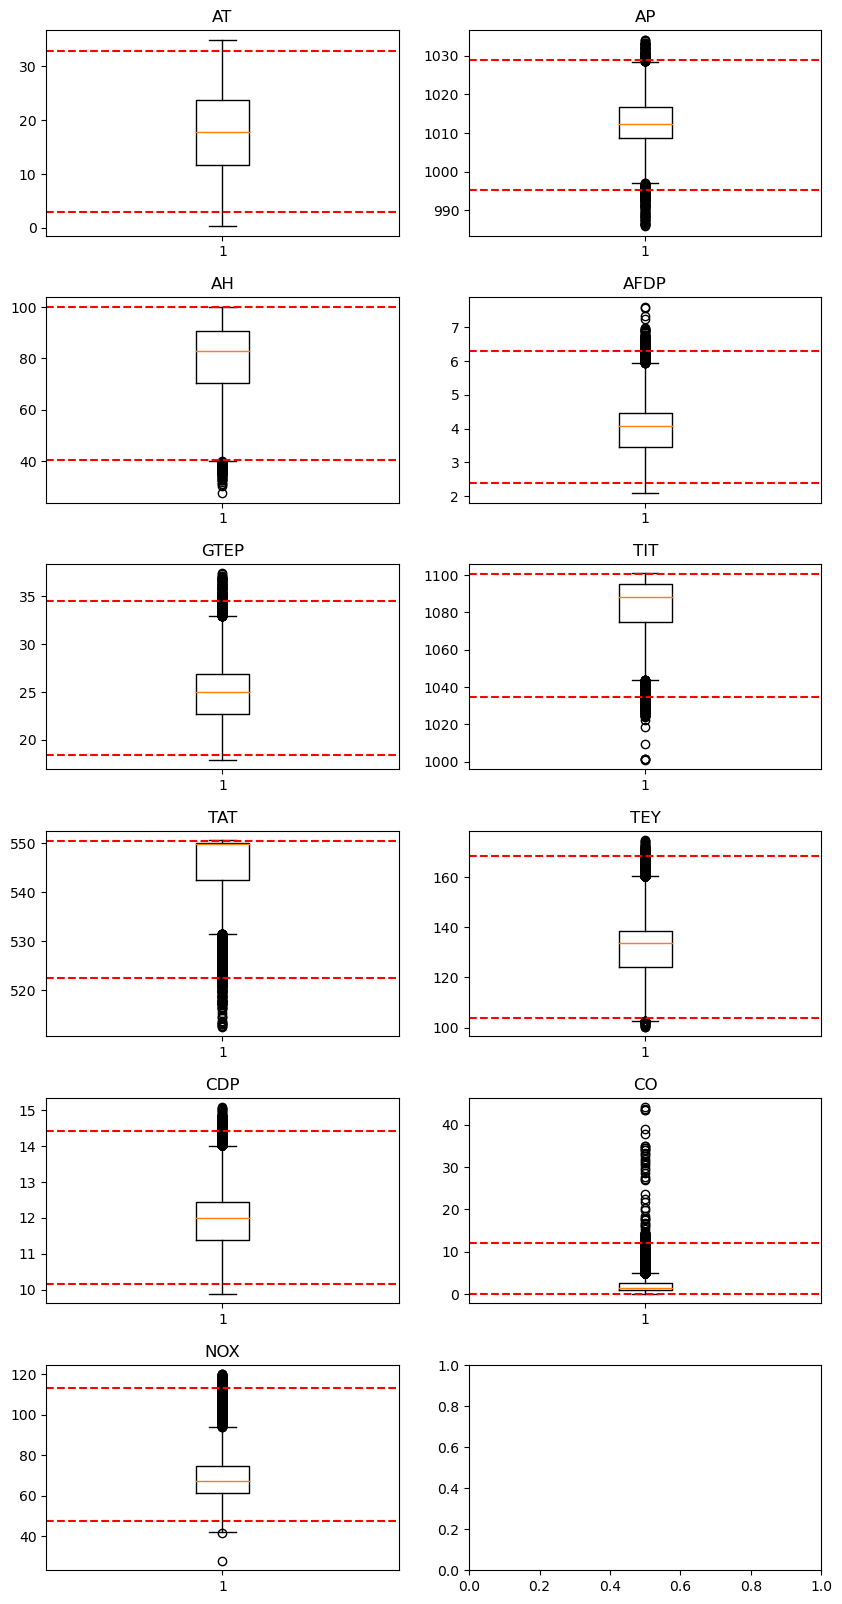

In [12]:
## Function to plot all the features in the training + validation set (df_tv)

rows = len(features)//2 + 1
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (10,20))
plt.subplots_adjust(hspace=0.3)
for m in range(rows):
    ax[m,0].boxplot(df_tv[features[m*2]])
    ax[m,0].axhline(np.percentile(df_tv[features[m*2]], 99.5), linestyle = '--', color = "r")
    ax[m,0].axhline(np.percentile(df_tv[features[m*2]], 0.5), linestyle = '--', color = "r")
    ax[m,0].set_title(features[m*2])
    if m < (rows-1):
        ax[m,1].boxplot(df_tv[features[m*2 + 1]])
        ax[m,1].axhline(np.percentile(df_tv[features[m*2+1]], 99.5), linestyle = '--', color = "r")
        ax[m,1].axhline(np.percentile(df_tv[features[m*2+1]], 0.5), linestyle = '--', color = "r")
        ax[m,1].set_title(features[m*2 + 1])
    else:
        pass
fig_save(fig, "Features Boxplot")

Removing Outliers in training + validation data

In [14]:
# Removing outliers (NOX < 40; CO > 35; AFDP > 7; TIT < 1015)
print(f"entries before removing outliers: {len(df_tv)}")
df_tv = df_tv[df_tv.NOX > 40]
df_tv = df_tv[df_tv.CO < 35]
df_tv = df_tv[df_tv.AFDP < 7]
df_tv = df_tv[df_tv.TIT > 1015]
print(f"entries after removing outliers: {len(df_tv)}")

entries before removing outliers: 22191
entries after removing outliers: 22174


## 1.2 Preparing function to perform Feature Selection

#### We will be using Exhaustive Feature Selection technique in this analysis

In [16]:
# Creating a Function for implementing Exhaustive Feature Selection 
## using ExhaustiveFeatureSelector function of mlxtend module

from mlxtend.feature_selection import ExhaustiveFeatureSelector
    
def exh_feature_sel(model, X, y, features_list, min_features = 3, max_features = 7):
    """
    exh_feature_sel(model, X, y, features_list, min_features = 3, max_features = 7)
    
    Uses ExhaustiveFeatureSelector function of mlxtend module to perform feature selection.
    
    """

    efs = ExhaustiveFeatureSelector(model, min_features = min_features, max_features = max_features,
                                    scoring = "neg_mean_squared_error", cv = 2)
    efs = efs.fit(X, y)
    efs_features = [features_list[int(i)] for i in list(efs.best_idx_)]
    
    return efs_features

### Custom Function for plotting predicted values against actual values

In [17]:
## Function for plotting predicted values vs actual values of CO/NOx emissions

def predict_plot(actual, predicted, fig_title = ""):
    """
    predict_plot(actual_values, predicted_values)
    """
    import matplotlib as mpl
    cmap = mpl.cm.get_cmap("plasma")
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.scatter(actual, predicted, alpha = 0.2 , c = cmap((np.abs(actual)-np.abs(predicted))/np.abs(actual)))
    ax.set_xlabel("Actual Emission values")
    ax.set_ylabel("Predicted Emission values")
    ax.plot(np.linspace(actual.min(), actual.max(), 100), np.linspace(actual.min(), actual.max(), 100), "r--")
    ax.set_title(fig_title)
    sm = mpl.cm.ScalarMappable(cmap = cmap)
    cbar = plt.colorbar(sm)
    cbar.set_label('Error in predictions scaled to [0,1]', rotation=270)
    cbar.ax.set_yticklabels(['0','','','',"",'1'])
    plt.show()
    return fig

## Splitting data into Training and Validation sets

In [18]:
df_train = df_tv[df_tv.Year <= 2012]
df_val = df_tv[df_tv.Year == 2013]

print(f"entries in training set: {len(df_train)}, entries in validation set: {len(df_val)}")

entries in training set: 15023, entries in validation set: 7151


# ------------------------------------------------CO------------------------------------------------------

# 2. Training for prediction of CO emission amount

In [19]:
CO_train_X = df_train.drop(["CO", "NOX"], axis = 1)
CO_train_y = df_train["CO"]

In [20]:
CO_val_X = df_val.drop(["CO", "NOX"], axis = 1)
CO_val_y = df_val["CO"]

In [21]:
print(f"No. of entries in training set: {len(CO_train_X)}")

No. of entries in training set: 15023


In [22]:
CO_test_X = df_test.drop(["CO", "NOX"], axis = 1)
CO_test_y = df_test["CO"]

In [23]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()

CO_train_scaled = stdscaler.fit_transform(CO_train_X)
CO_train_scaled = pd.DataFrame(data = CO_train_scaled, columns = list(CO_train_X.columns), index = np.arange(len(CO_train_scaled)))

CO_val_scaled = stdscaler.transform(CO_val_X)
CO_val_scaled = pd.DataFrame(data = CO_val_scaled, columns = list(CO_val_X.columns), index = np.arange(len(CO_val_scaled)))

CO_test_scaled = stdscaler.transform(CO_test_X)
CO_test_scaled = pd.DataFrame(data = CO_test_scaled, columns = list(CO_test_X.columns), index = np.arange(len(CO_test_scaled)))


In [24]:
CO_train_scaled.head()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0 -1.740832  0.859194  0.330572 -0.822801 -0.345745  0.143474  0.563181   
1 -1.779734  0.796769  0.371168 -0.829262 -0.352457  0.137390  0.591254   
2 -1.831062  0.812375  0.416331 -0.813573 -0.343108  0.161727  0.609119   
3 -1.852309  0.796769  0.458087 -0.816210 -0.362045  0.161727  0.606567   
4 -1.851253  0.718739  0.439818 -0.819769 -0.360607  0.125222  0.584874   

        TEY       CDP     Year  
0  0.029509 -0.185913 -1.01455  
1  0.029509 -0.191354 -1.01455  
2  0.056700 -0.055325 -1.01455  
3  0.052273 -0.102482 -1.01455  
4  0.029509 -0.175030 -1.01455

In [25]:
CO_val_scaled.head()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0 -1.108296  1.077678  0.808082 -2.382572 -1.499468 -2.448326 -0.543151   
1 -1.118781  1.046466  0.784304 -2.408281 -1.510734 -2.673435 -0.826433   
2 -1.140543  1.030860  0.779520 -2.392196 -1.496591 -2.606511 -0.758803   
3 -1.161961  0.952830  0.752117 -2.396020 -1.496112 -2.843788 -1.088023   
4 -1.156125  0.921618  0.723773 -2.367147 -1.489879 -2.454410 -0.531667   

        TEY       CDP      Year  
0 -1.520392 -1.395662  2.985867  
1 -1.579201 -1.388407  2.985867  
2 -1.554539 -1.414706  2.985867  
3 -1.601333 -1.491789  2.985867  
4 -1.524818 -1.486348  2.985867

## 2.1 First trying Linear models

### 2.1.1 Linear Regression

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
CO_train_scaled = scaler.fit_transform(CO_train_X)
CO_test_scaled = scaler.transform(CO_test_X)

In [48]:
from sklearn.linear_model import LinearRegression
CO_lin_reg = LinearRegression()
CO_lin_reg.fit(CO_train_scaled, CO_train_y)

LinearRegression()

In [218]:
from sklearn.metrics import mean_squared_error
mean = mean_squared_error(CO_train_y, CO_lin_reg.predict(CO_train_scaled))
print(f"Linear Regression Mean Squared Error on training dataset: {mean}")
print(f"Linear Regression Mean Error on training dataset: {np.sqrt(mean)}")

Linear Regression Mean Squared Error on training dataset: 1.6554171593076903
Linear Regression Mean Error on training dataset: 1.2866301563804925


### 2.1.2 Ridge Regresssion

In [72]:
from sklearn.linear_model import Ridge
CO_ridge = Ridge()
CO_ridge.fit(CO_train_scaled, CO_train_y)

from sklearn.metrics import mean_squared_error
mean = mean_squared_error(CO_train_y, CO_ridge.predict(CO_train_scaled))
print(f"Linear Regression Mean Squared Error on training dataset: {mean}")
print(f"Linear Regression Mean Error on training dataset: {np.sqrt(mean)}")

Linear Regression Mean Squared Error on training dataset: 1.6556621481758154
Linear Regression Mean Error on training dataset: 1.2867253584879002


### 2.1.3 Lasso Regression

In [77]:
from sklearn.linear_model import Lasso
CO_lasso = Lasso()
CO_lasso.fit(CO_train_scaled, CO_train_y)

from sklearn.metrics import mean_squared_error
mean = mean_squared_error(CO_train_y, CO_lasso.predict(CO_train_scaled))
print(f"Linear Regression Mean Squared Error on training dataset: {mean}")
print(f"Linear Regression Mean Error on training dataset: {np.sqrt(mean)}")

Linear Regression Mean Squared Error on training dataset: 3.031908604538981
Linear Regression Mean Error on training dataset: 1.741237664576258


## 2.2 Trying Support Vector Machines

In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

### 2.2.1 Polynomial Kernel

#### 2.2.1.1 Degree = 3

In [81]:
CO_svr_poly_3 = SVR(kernel = "poly")
CO_svr_poly_3.fit(CO_train_scaled, CO_train_y)
mean = mean_squared_error(CO_train_y, CO_svr_poly_3.predict(CO_train_scaled))
print(f"SVM Squared Error on training dataset: {mean}")
print(f"SVM Error on training dataset: {np.sqrt(mean)}")

SVM Squared Error on training dataset: 1.4314421884252413
SVM Error on training dataset: 1.1964289316232875


#### 2.2.1.2 Degree = 4

In [82]:
CO_svr_poly_4 = SVR(kernel = "poly", degree = 4)
CO_svr_poly_4.fit(CO_train_scaled, CO_train_y)
mean = mean_squared_error(CO_train_y, CO_svr_poly_4.predict(CO_train_scaled))
print(f"SVM Squared Error on training dataset: {mean}")
print(f"SVM Error on training dataset: {np.sqrt(mean)}")

SVM Squared Error on training dataset: 1.5865503437252204
SVM Error on training dataset: 1.2595834008612612


#### 2.2.1.3 Degree = 5

In [26]:
CO_svr_poly_5 = SVR(kernel = "poly", degree = 5)
CO_svr_poly_5.fit(CO_train_scaled, CO_train_y)
mean = mean_squared_error(CO_train_y, CO_svr_poly_5.predict(CO_train_scaled))
print(f"SVM Squared Error on training dataset: {mean}")
print(f"SVM Error on training dataset: {np.sqrt(mean)}")

SVM Squared Error on training dataset: 1.23712795846784
SVM Error on training dataset: 1.1122625402609942


In [126]:
exh_feat_svr_poly_5 = exh_feature_sel(CO_svr_poly_5, CO_train_scaled, CO_train_y, 
                                     list(CO_train_X.columns))
exh_feat_svr_poly_5

Features: 912/912

['AT', 'TEY', 'CDP']

### 2.2.2 Gaussian Radial Basis Function Kernel (RBF)

In [27]:
CO_svr_rbf = SVR(kernel = "rbf")
CO_svr_rbf.fit(CO_train_scaled, CO_train_y)
mean = mean_squared_error(CO_train_y, CO_svr_rbf.predict(CO_train_scaled))
print(f"SVM Squared Error on training dataset: {mean}")
print(f"SVM Error on training dataset: {np.sqrt(mean)}")

SVM Squared Error on training dataset: 1.2620607838612943
SVM Error on training dataset: 1.1234147870939275


Features: 912/912

1.2286526350849536


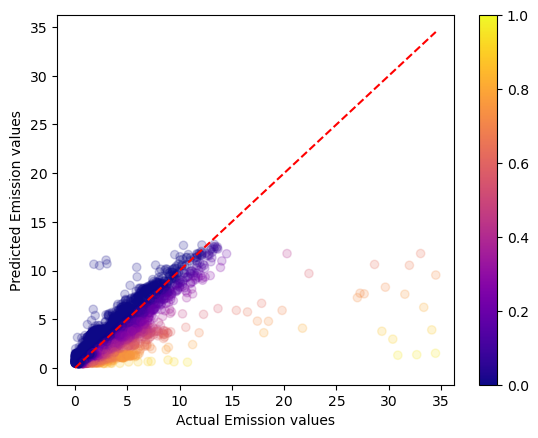

In [128]:
exh_feat_rbf = exh_feature_sel(CO_svr_rbf, CO_train_scaled, CO_train_y, 
                                     list(CO_train_X.columns))
exh_feat_rbf

X = CO_train_X.loc[:,exh_feat_rbf]
X = StandardScaler().fit_transform(X)
model = SVR(kernel = "rbf")
model.fit(X, CO_train_y)
print(np.sqrt(mean_squared_error(CO_train_y, model.predict(X))))
predict_plot(CO_train_y, model.predict(X))

In [130]:
exh_feat_rbf

['AH', 'TAT', 'TEY']

## 2.3 Trying Random Forest Regressors

In [28]:
from sklearn.ensemble import RandomForestRegressor
CO_rf = RandomForestRegressor()
CO_rf.fit(CO_train_scaled, CO_train_y)
mean = mean_squared_error(CO_train_y, CO_rf.predict(CO_train_scaled))
print(f"Random Forest Squared Error on training dataset: {mean}")
print(f"Random Forest Error on training dataset: {np.sqrt(mean)}")

Random Forest Squared Error on training dataset: 0.15531213641801728
Random Forest Error on training dataset: 0.3940966079757821


Features: 912/912

0.44637928722035825


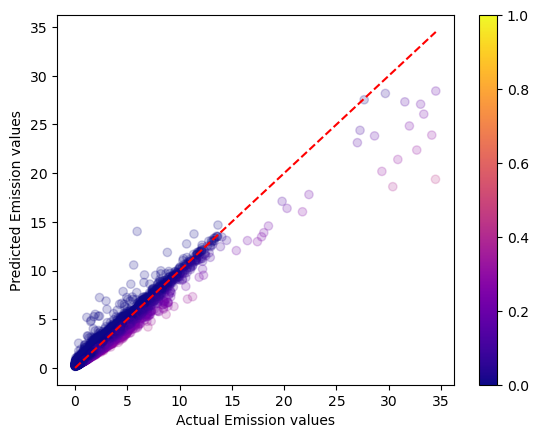

['AH', 'TAT', 'TEY']

In [132]:
exh_feat_rfr = exh_feature_sel(CO_rf, CO_train_scaled, CO_train_y, 
                                     list(CO_train_X.columns))

X = CO_train_X.loc[:,exh_feat_rfr]
X = StandardScaler().fit_transform(X)
model = RandomForestRegressor()
model.fit(X, CO_train_y)
print(np.sqrt(mean_squared_error(CO_train_y, model.predict(X))))
predict_plot(CO_train_y, model.predict(X))

exh_feat_rfr

## 2.4 Trying Multiple Layer Perceptrons

In [29]:
from sklearn.neural_network import MLPRegressor
CO_mlp = MLPRegressor(activation = "logistic", max_iter = 2000)
CO_mlp.fit(CO_train_scaled, CO_train_y)

MLPRegressor(activation='logistic', max_iter=2000)

In [ ]:
exh_feat_mlp = exh_feature_sel(CO_mlp, CO_train_scaled, CO_train_y, list(CO_train_X.columns))
exh_feat_mlp

X = CO_train_X.loc[:,exh_feat_mlp]
X = StandardScaler().fit_transform(X)
model = MLPRegressor(activation = "logistic", max_iter = 2000)
model.fit(X, CO_train_y)
print(np.sqrt(mean_squared_error(CO_train_y, model.predict(X))))
predict_plot(CO_train_y, model.predict(X))

In [ ]:
exh_feat_mlp

## 2.5 Trying KNNRegressor model

In [30]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(CO_train_scaled, CO_train_y)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(CO_train_y, knn_reg.predict(CO_train_scaled))

0.33991288384131

In [56]:
exh_feat_knn = exh_feature_sel(knn_reg, CO_train_scaled, CO_train_y, 
                                     list(CO_train_X.columns))

X = CO_train_X.loc[:,exh_feat_knn]
X = StandardScaler().fit_transform(X)
model = KNeighborsRegressor()
model.fit(X, CO_train_y)
print(np.sqrt(mean_squared_error(CO_train_y, model.predict(X))))
predict_plot(CO_train_y, model.predict(X))

exh_feat_knn

Features: 912/912

NameError: name 'mean_squared_error' is not defined

In [57]:
exh_feat_knn

['TAT', 'TEY', 'Year']

# 3.0 Implementing feature selection

Creating a custom transformer to use alongwith column transformer to train the models on the best features selected through feature selection

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class nothing_transformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass
  def fit(self, X, y = None):
    return self
  def transform(self, X, y = None):
    return X

In [28]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

## 3.1 Implementing feature selection on SVR poly 5

In [29]:
from sklearn.metrics import mean_absolute_error, r2_score

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ff = list(CO_train_X.columns)
best_f_svr_poly_5 = ["AT", "TEY", "CDP"]
best_features_svr_poly_5 = [ff.index(i) for i in best_f_svr_poly_5]

CT_svr_poly_5 = ColumnTransformer([("best_features_svr_poly_5", nothing_transformer(), best_features_svr_poly_5)], remainder = "drop")

pipe_svr_poly_5 = Pipeline([
    ("CT_svr_poly_5", CT_svr_poly_5),
    ("model_svr_poly_5", SVR(kernel = "poly", degree = 5, C = 0.1))
])

pipe_svr_poly_5.fit(CO_train_scaled, CO_train_y)


Pipeline(steps=[('CT_svr_poly_5',
                 ColumnTransformer(transformers=[('best_features_svr_poly_5',
                                                  nothing_transformer(),
                                                  [0, 7, 8])])),
                ('model_svr_poly_5', SVR(C=0.1, degree=5, kernel='poly'))])

In [31]:
mean_absolute_error(CO_val_y, pipe_svr_poly_5.predict(CO_val_scaled))

0.9363927434051842

In [32]:
mean_absolute_error(CO_test_y, pipe_svr_poly_5.predict(CO_test_scaled))

1.0842286109968164

## 3.2 Implementing feature selection on SVR rbf kernel

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ff = list(CO_train_X.columns)
best_f_svr_rbf = ["TAT", "TEY", "AH"]
best_features_svr_rbf = [ff.index(i) for i in best_f_svr_rbf]

CT_svr_rbf = ColumnTransformer([("best_features_svr_rbf", nothing_transformer(), best_features_svr_rbf)], remainder = "drop")

pipe_svr_rbf = Pipeline([
    ("CT_svr_rbf", CT_svr_rbf),
    ("model_svr_rbf", SVR(kernel = "rbf", C = 10))
])

pipe_svr_rbf.fit(CO_train_scaled, CO_train_y)


Pipeline(steps=[('CT_svr_rbf',
                 ColumnTransformer(transformers=[('best_features_svr_rbf',
                                                  nothing_transformer(),
                                                  [6, 7, 2])])),
                ('model_svr_rbf', SVR(C=10))])

In [34]:
mean_absolute_error(CO_val_y, pipe_svr_rbf.predict(CO_val_scaled))

0.8108228648446015

In [35]:
mean_absolute_error(CO_test_y, pipe_svr_rbf.predict(CO_test_scaled))

0.9279570624046966

In [36]:
r2_score(CO_test_y, pipe_svr_rbf.predict(CO_test_scaled))

0.49659390139092396

## 3.3 Implementing feature selection on Random Forest

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ff = list(CO_train_X.columns)
best_f_rf = ["TAT", "TEY", "AH"]
best_features_rf = [ff.index(i) for i in best_f_rf ]
CT_rf = ColumnTransformer([("best_features_rf", nothing_transformer(), best_features_rf)], remainder = "drop")

pipe_rf = Pipeline([
    ("CT_rf", CT_rf),
    ("model_rf", RandomForestRegressor(n_estimators = 2000,
 min_samples_split = 10,
 min_samples_leaf = 4,
 max_features = "sqrt",
 max_depth = 10,
 bootstrap = False))
])

pipe_rf.fit(CO_train_scaled, CO_train_y)


Pipeline(steps=[('CT_rf',
                 ColumnTransformer(transformers=[('best_features_rf',
                                                  nothing_transformer(),
                                                  [6, 7, 2])])),
                ('model_rf',
                 RandomForestRegressor(bootstrap=False, max_depth=10,
                                       max_features='sqrt', min_samples_leaf=4,
                                       min_samples_split=10,
                                       n_estimators=2000))])

In [38]:
mean_absolute_error(CO_val_y, pipe_rf.predict(CO_val_scaled))

0.7376774436019466

In [80]:
r2_score(CO_val_y, pipe_rf.predict(CO_val_scaled))

0.7069137940965081

In [39]:
mean_absolute_error(CO_test_y, pipe_rf.predict(CO_test_scaled))

0.886348587592279

In [40]:
r2_score(CO_test_y, pipe_rf.predict(CO_test_scaled))

0.5181138694321549

## 3.4 Implementing feature selection on Multi Layer Perceptron

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ff = list(CO_train_X.columns)
best_f_mlp = ["AH", "GTEP", "TIT"]
best_features_mlp = [ff.index(i) for i in best_f_mlp]

CT_mlp = ColumnTransformer([("best_features_mlp", nothing_transformer(), best_features_mlp)], remainder = "drop")

pipe_mlp = Pipeline([
    ("CT_mlp", CT_mlp),
    ("model_mlp", MLPRegressor(max_iter = 3000,
                              solver = 'adam',
 learning_rate = 'constant',
 hidden_layer_sizes = (20,),
 alpha = 0.05,
 activation = 'tanh'))
])

pipe_mlp.fit(CO_train_scaled, CO_train_y)


Pipeline(steps=[('CT_mlp',
                 ColumnTransformer(transformers=[('best_features_mlp',
                                                  nothing_transformer(),
                                                  [2, 4, 5])])),
                ('model_mlp',
                 MLPRegressor(activation='tanh', alpha=0.05,
                              hidden_layer_sizes=(20,), max_iter=3000))])

In [42]:
mean_absolute_error(CO_val_y, pipe_mlp.predict(CO_val_scaled))

0.7816439412303177

In [43]:
mean_absolute_error(CO_test_y, pipe_mlp.predict(CO_test_scaled))

1.5590862291858292

## 3.5 Implementing feature selection on KNeighborsRegressor

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

ff = list(CO_train_X.columns)
best_f_knn = ['TAT', 'TEY', 'Year']
best_features_knn = [ff.index(i) for i in best_f_knn]

CT_knn = ColumnTransformer([("best_features_knn", nothing_transformer(), best_features_knn)], remainder = "drop")

pipe_knn = Pipeline([
    ("CT_knn", CT_knn),
    ("model_knn", KNeighborsRegressor(
    p = 2, n_neighbors = 12, leaf_size = 35
    ))
])

pipe_knn.fit(CO_train_scaled, CO_train_y)


Pipeline(steps=[('CT_knn',
                 ColumnTransformer(transformers=[('best_features_knn',
                                                  nothing_transformer(),
                                                  [6, 7, 9])])),
                ('model_knn',
                 KNeighborsRegressor(leaf_size=35, n_neighbors=12))])

In [45]:
mean_absolute_error(CO_val_y, pipe_knn.predict(CO_val_scaled))

0.7780947659791171

In [46]:
mean_absolute_error(CO_test_y, pipe_knn.predict(CO_test_scaled))

0.8628094311362491

In [47]:
r2_score(CO_test_y, pipe_knn.predict(CO_test_scaled))

0.5655322601957196

# 4.0 Hyperparameter tuning for top 4 models

## 4.1 Tuning SVR polynomial degree 5 model

In [100]:
model = pipe_svr_poly_5

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "model_svr_poly_5__C": np.logspace(-3,2,6)
}

rand_search_svr_poly_5 = RandomizedSearchCV(model, param_grid, n_iter = 15, cv = 2, random_state = 42, verbose = 5)
rand_search_svr_poly_5.fit(CO_train_scaled, CO_train_y)


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 6 is smaller than n_iter=15. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END .........model_svr_poly_5__C=0.001;, score=0.403 total time=   4.6s
[CV 2/2] END .........model_svr_poly_5__C=0.001;, score=0.266 total time=   4.5s
[CV 1/2] END ..........model_svr_poly_5__C=0.01;, score=0.451 total time=   5.1s
[CV 2/2] END ..........model_svr_poly_5__C=0.01;, score=0.347 total time=   5.4s
[CV 1/2] END ...........model_svr_poly_5__C=0.1;, score=0.471 total time=   5.4s


KeyboardInterrupt: 

In [ ]:
rand_search_svr_poly_5.best_params_

## 4.2 Tuning RF

In [66]:
model = pipe_rf

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'model_rf__bootstrap': [True, False],
 'model_rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'model_rf__max_features': ['auto', 'sqrt'],
 'model_rf__min_samples_leaf': [1, 2, 4],
 'model_rf__min_samples_split': [2, 5, 10],
 'model_rf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rand_search_rf = RandomizedSearchCV(model, param_grid, n_iter = 100, cv = 2, random_state = 42, verbose = 5)
rand_search_rf.fit(CO_train_scaled, CO_train_y)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.427 total time=  12.4s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.563 total time=  11.9s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.427 total time=  11.4s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.563 total time=  10.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.250 total time=  26.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.568 total time=  27.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.155 total time=   4.5s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.566 total time=   4.3s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=1200;, score=0.434 total time=   9.5s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=1200;, score=0.563 total time=  10.1s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1600;, score=0.427 total time=  15.8s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.257 total time=  32.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.570 total time=  34.7s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.380 total time=   7.6s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.574 total time=   7.3s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1000;, score=0.423 total time=  10.9s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_sample

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.066 total time=  51.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.372 total time=  51.5s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=2000;, score=0.157 total time=  55.5s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=2000;, score=0.432 total time=  52.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.083 total time=  57.8s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.403 total time=  51.0s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1000;, score=0.443 total time=   7.7s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1000;, score=0.550 total time=   7.0s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.336 total time=   6.2s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_sam

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=-0.035 total time=  37.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.346 total time=  37.5s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.423 total time=  17.1s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.566 total time=  14.3s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=70, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.410 total time=  17.3s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=70, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_sampl

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1000;, score=0.365 total time=  16.6s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1000;, score=0.567 total time=  18.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.158 total time=   5.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.432 total time=   4.7s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=70, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.441 total time=   2.8s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=70, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.551 total time=   2.7s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1600;, score=0.381 total time=  19.9s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=-0.095 total time=  50.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.395 total time=  47.2s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=200;, score=0.445 total time=   1.4s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=200;, score=0.549 total time=   1.3s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.424 total time=  10.6s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_sampl

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.251 total time=   6.5s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.571 total time=   6.5s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1600;, score=0.387 total time=  21.8s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1600;, score=0.574 total time=  19.6s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=400;, score=0.203 total time=   6.8s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=400;, score=0.566 total time=   6.5s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=2000;, score=0.157 total time=  52.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=2000;, score=0.432 total time=  48.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=1000;, score=0.207 total time=  10.8s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=1000;, score=0.577 total time=  10.9s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.384 total time=   2.5s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.577 total time=   2.4s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=600;, score=0.412 total time=   4.8s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samp

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=800;, score=0.141 total time=  14.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=800;, score=0.385 total time=  14.8s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=200;, score=-0.119 total time=   7.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=200;, score=0.385 total time=   6.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=600;, score=0.200 total time=  13.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=600;, score=0.567 total time=  10.6s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.360 total time=   2.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.571 total time=   2.9s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1800;, score=0.406 total time=  20.2s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1800;, score=0.566 total time=  18.6s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1600;, score=0.441 total time=  13.9s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1000;, score=0.215 total time=  17.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1000;, score=0.567 total time=  16.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=200;, score=0.371 total time=   2.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=200;, score=0.566 total time=   2.0s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.407 total time=  18.8s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.569 total time=  18.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=-0.034 total time=  59.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.362 total time=  49.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=40, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.214 total time=  31.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=40, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.569 total time=  30.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.243 total time=  10.8s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.569 total time=  10.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=-0.119 total time= 1.0min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.391 total time=  58.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1800;, score=0.185 total time=  19.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1800;, score=0.569 total time=  19.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1600;, score=0.066 total time=  44.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1600;, score=0.373 total time=  41.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.359 total time=  28.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.568 total time=  26.9s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=1600;, score=0.441 total time=  11.6s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=1600;, score=0.555 total time=  11.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=-0.119 total time=  60.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.388 total time=  55.6s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=800;, score=0.383 total time=  10.8s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=800;, score=0.574 total time=   9.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.210 total time=  36.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.568 total time=  32.5s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=200;, score=0.371 total time=   2.5s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=200;, score=0.574 total time=   2.4s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=60, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=1400;, score=0.398 total time=  16.4s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=60, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_sa

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.158 total time=  10.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.432 total time=   9.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1200;, score=0.359 total time=  19.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1200;, score=0.568 total time=  19.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=2000;, score=0.073 total time=  31.6s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=2000;, score=0.375 total time=  32.1s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.421 total time=  19.6s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.567 total time=  19.4s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.378 total time=   2.7s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_sa

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.257 total time=   6.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.571 total time=   6.5s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=600;, score=0.213 total time=  10.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=600;, score=0.566 total time=   9.7s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.404 total time=   6.4s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.569 total time=   6.3s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1200;, score=0.383 total time=  14.9s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_sample

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1400;, score=0.072 total time=  23.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1400;, score=0.375 total time=  22.5s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.147 total time=   4.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.558 total time=   4.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=-0.000 total time=  31.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.413 total time=  32.2s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1200;, score=0.385 total time=  15.5s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1200;, score=0.575 total time=  14.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.077 total time=  20.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.375 total time=  18.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=600;, score=0.355 total time=   9.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=600;, score=0.568 total time=   9.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.251 total time=  32.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.570 total time=  33.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.221 total time=  51.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.430 total time=  48.9s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=800;, score=0.442 total time=   5.9s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=800;, score=0.553 total time=   5.7s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1600;, score=0.402 total time=  17.3s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samp

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.243 total time=  22.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.568 total time=  21.1s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.442 total time=  13.9s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.552 total time=  16.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1000;, score=-0.034 total time=  34.8s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1000;, score=0.346 total time=  31.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.221 total time=  50.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.430 total time=  47.7s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.426 total time=  13.0s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.568 total time=  14.6s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.358 total time=  34.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.570 total time=  30.3s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=20, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.371 total time=  25.4s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=20, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.571 total time=  23.6s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=200;, score=0.265 total time=   3.5s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=200;, score=0.569 total time=   3.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=-0.095 total time=  36.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.394 total time=  38.8s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.440 total time=   7.9s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.549 total time=   7.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=200;, score=0.259 total time=   3.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=200;, score=0.567 total time=   3.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1000;, score=-0.308 total time=  35.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1000;, score=0.358 total time=  32.5s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=100, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=600;, score=0.066 total time=  17.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=100, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=600;, score=0.375 total time=  16.8s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=40, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1200;, score=0.416 total time=   9.6s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=40, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1200;, score=0.566 total time=   9.5s


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('CT_rf',
                                              ColumnTransformer(transformers=[('best_features_rf',
                                                                               nothing_transformer(),
                                                                               ['TAT',
                                                                                'TEY',
                                                                                'AH'])])),
                                             ('model_rf',
                                              RandomForestRegressor())]),
                   n_iter=100,
                   param_distributions={'model_rf__bootstrap': [True, False],
                                        'model_rf__max_depth': [10, 20, 30, 40,
                                                                50, 60, 70, 80,
                                                                90, 100, None],
                                        'model_rf__max_features': ['auto',
                                                                   'sqrt'],
                                        'model_rf__min_samples_leaf': [1, 2, 4],
                                        'model_rf__min_samples_split': [2, 5,
                                                                        10],
                                        'model_rf__n_estimators': [200, 400,
                                                                   600, 800,
                                                                   1000, 1200,
                                                                   1400, 1600,
                                                                   1800,
                                                                   2000]},
                   random_state=42, verbose=5)

In [67]:
rand_search_rf.best_params_

{'model_rf__n_estimators': 2000,
 'model_rf__min_samples_split': 10,
 'model_rf__min_samples_leaf': 4,
 'model_rf__max_features': 'sqrt',
 'model_rf__max_depth': 10,
 'model_rf__bootstrap': False}

## 4.3 Tuning MLP

In [134]:
model = pipe_mlp

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'model_mlp__hidden_layer_sizes': [(10,30,10),(20,)],
    'model_mlp__activation': ['tanh', 'relu'],
    'model_mlp__solver': ['sgd', 'adam'],
    'model_mlp__alpha': [0.0001, 0.05],
    'model_mlp__learning_rate': ['constant','adaptive'],
}

rand_search_mlp = RandomizedSearchCV(model, param_grid, n_iter = 100, cv = 2, random_state = 42, verbose = 5)
rand_search_mlp.fit(CO_train_scaled, CO_train_y)


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV 1/2] END model_mlp__activation=tanh, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(10, 30, 10), model_mlp__learning_rate=constant, model_mlp__solver=sgd;, score=0.426 total time=  12.5s
[CV 2/2] END model_mlp__activation=tanh, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(10, 30, 10), model_mlp__learning_rate=constant, model_mlp__solver=sgd;, score=0.539 total time=  15.5s
[CV 1/2] END model_mlp__activation=tanh, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(10, 30, 10), model_mlp__learning_rate=constant, model_mlp__solver=adam;, score=0.452 total time=  10.9s
[CV 2/2] END model_mlp__activation=tanh, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(10, 30, 10), model_mlp__learning_rate=constant, model_mlp__solver=adam;, score=0.522 total time=  13.4s
[CV 1/2] END model_mlp__activation=tanh, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(10, 30, 10), model_mlp__learning_rate=ad

[CV 1/2] END model_mlp__activation=relu, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(20,), model_mlp__learning_rate=constant, model_mlp__solver=adam;, score=0.480 total time=   4.5s
[CV 2/2] END model_mlp__activation=relu, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(20,), model_mlp__learning_rate=constant, model_mlp__solver=adam;, score=0.563 total time=   3.1s
[CV 1/2] END model_mlp__activation=relu, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(20,), model_mlp__learning_rate=adaptive, model_mlp__solver=sgd;, score=0.462 total time=   5.7s
[CV 2/2] END model_mlp__activation=relu, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(20,), model_mlp__learning_rate=adaptive, model_mlp__solver=sgd;, score=0.546 total time=   4.0s
[CV 1/2] END model_mlp__activation=relu, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(20,), model_mlp__learning_rate=adaptive, model_mlp__solver=adam;, score=0.447 total time=   6.7s
[CV 2/2] END model_mlp__activati

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('CT_mlp',
                                              ColumnTransformer(transformers=[('best_features_mlp',
                                                                               nothing_transformer(),
                                                                               [2,
                                                                                4,
                                                                                5])])),
                                             ('model_mlp',
                                              MLPRegressor(activation='tanh',
                                                           alpha=0.05,
                                                           hidden_layer_sizes=(20,),
                                                           max_iter=3000))]),
                   n_iter=100,
                   param_distributions={'model_mlp__activation': ['tanh',
                                                                  'relu'],
                                        'model_mlp__alpha': [0.0001, 0.05],
                                        'model_mlp__hidden_layer_sizes': [(10,
                                                                           30,
                                                                           10),
                                                                          (20,)],
                                        'model_mlp__learning_rate': ['constant',
                                                                     'adaptive'],
                                        'model_mlp__solver': ['sgd', 'adam']},
                   random_state=42, verbose=5)

In [135]:
rand_search_mlp.best_params_

{'model_mlp__solver': 'sgd',
 'model_mlp__learning_rate': 'adaptive',
 'model_mlp__hidden_layer_sizes': (20,),
 'model_mlp__alpha': 0.05,
 'model_mlp__activation': 'tanh'}

In [69]:
rand_search_mlp.best_params_

{'model_mlp__solver': 'adam',
 'model_mlp__learning_rate': 'constant',
 'model_mlp__hidden_layer_sizes': (20,),
 'model_mlp__alpha': 0.05,
 'model_mlp__activation': 'tanh'}

## 4.4 Tuning SVR rbf kernel model

In [85]:
model = pipe_svr_rbf

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "model_svr_rbf__C": np.logspace(-3,2,6)
}

rand_search_svr_rbf = RandomizedSearchCV(model, param_grid, n_iter = 15, cv = 2, random_state = 42, verbose = 5)
rand_search_svr_rbf.fit(CO_train_scaled, CO_train_y)


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 6 is smaller than n_iter=15. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END ............model_svr_rbf__C=0.001;, score=0.157 total time=   8.2s
[CV 2/2] END ...........model_svr_rbf__C=0.001;, score=-0.060 total time=   8.4s
[CV 1/2] END .............model_svr_rbf__C=0.01;, score=0.252 total time=   7.3s
[CV 2/2] END .............model_svr_rbf__C=0.01;, score=0.142 total time=   8.0s
[CV 1/2] END ..............model_svr_rbf__C=0.1;, score=0.385 total time=   7.4s
[CV 2/2] END ..............model_svr_rbf__C=0.1;, score=0.427 total time=   7.5s
[CV 1/2] END ..............model_svr_rbf__C=1.0;, score=0.444 total time=   7.6s
[CV 2/2] END ..............model_svr_rbf__C=1.0;, score=0.482 total time=   7.4s
[CV 1/2] END .............model_svr_rbf__C=10.0;, score=0.460 total time=   7.5s
[CV 2/2] END .............model_svr_rbf__C=10.0;, score=0.506 total time=   7.7s
[CV 1/2] END ............model_svr_rbf__C=100.0;, score=0.315 total time=   9.5s
[CV 2/2] END ............model_svr_rbf__C=100.0;,

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('CT_svr_rbf',
                                              ColumnTransformer(transformers=[('best_features_svr_rbf',
                                                                               nothing_transformer(),
                                                                               ['TAT',
                                                                                'TEY',
                                                                                'AH'])])),
                                             ('model_svr_rbf', SVR())]),
                   n_iter=15,
                   param_distributions={'model_svr_rbf__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
                   random_state=42, verbose=5)

In [86]:
rand_search_svr_rbf.best_params_

{'model_svr_rbf__C': 10.0}

## 4.5 Tuning KNN model

In [67]:
model = pipe_knn

from sklearn.model_selection import RandomizedSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(model_knn__leaf_size=leaf_size, model_knn__n_neighbors=n_neighbors, model_knn__p=p)

param_grid = hyperparameters

rand_search_knn = RandomizedSearchCV(model, param_grid, n_iter = 100, cv = 2, random_state = 42, verbose = 5)
rand_search_knn.fit(CO_train_scaled, CO_train_y)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2] END model_knn__leaf_size=8, model_knn__n_neighbors=5, model_knn__p=2;, score=0.395 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=8, model_knn__n_neighbors=5, model_knn__p=2;, score=0.568 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=39, model_knn__n_neighbors=15, model_knn__p=2;, score=0.472 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=39, model_knn__n_neighbors=15, model_knn__p=2;, score=0.571 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=20, model_knn__n_neighbors=24, model_knn__p=2;, score=0.477 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=20, model_knn__n_neighbors=24, model_knn__p=2;, score=0.475 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=20, model_knn__n_neighbors=6, model_knn__p=2;, score=0.420 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=20, model_knn__n_neighbors=6, model_knn__p=2;, score=0.582 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=22, m

[CV 2/2] END model_knn__leaf_size=3, model_knn__n_neighbors=13, model_knn__p=2;, score=0.590 total time=   0.1s
[CV 1/2] END model_knn__leaf_size=18, model_knn__n_neighbors=16, model_knn__p=2;, score=0.473 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=18, model_knn__n_neighbors=16, model_knn__p=2;, score=0.557 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=21, model_knn__n_neighbors=24, model_knn__p=1;, score=0.477 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=21, model_knn__n_neighbors=24, model_knn__p=1;, score=0.487 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=45, model_knn__n_neighbors=10, model_knn__p=2;, score=0.459 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=45, model_knn__n_neighbors=10, model_knn__p=2;, score=0.586 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=28, model_knn__n_neighbors=11, model_knn__p=2;, score=0.465 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=28, model_knn__n_neighbors=11, model_knn__p=2;, score=0.589 tot

[CV 1/2] END model_knn__leaf_size=42, model_knn__n_neighbors=14, model_knn__p=1;, score=0.474 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=42, model_knn__n_neighbors=14, model_knn__p=1;, score=0.565 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=24, model_knn__n_neighbors=11, model_knn__p=2;, score=0.465 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=24, model_knn__n_neighbors=11, model_knn__p=2;, score=0.589 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=28, model_knn__n_neighbors=19, model_knn__p=1;, score=0.480 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=28, model_knn__n_neighbors=19, model_knn__p=1;, score=0.526 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=27, model_knn__n_neighbors=27, model_knn__p=2;, score=0.478 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=27, model_knn__n_neighbors=27, model_knn__p=2;, score=0.454 total time=   0.1s
[CV 1/2] END model_knn__leaf_size=11, model_knn__n_neighbors=1, model_knn__p=2;, score=-0.134 to

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('CT_knn',
                                              ColumnTransformer(transformers=[('best_features_knn',
                                                                               nothing_transformer(),
                                                                               [6,
                                                                                7,
                                                                                9])])),
                                             ('model_knn',
                                              KNeighborsRegressor())]),
                   n_iter=100,
                   param_distributions={'model_knn__leaf_size': [1, 2, 3, 4, 5,
                                                                 6, 7, 8, 9, 10,
                                                                 11, 12, 13, 14,
                                                                 15, 16, 17, 18,
                                                                 19, 20, 21, 22,
                                                                 23, 24, 25, 26,
                                                                 27, 28, 29, 30, ...],
                                        'model_knn__n_neighbors': [1, 2, 3, 4,
                                                                   5, 6, 7, 8,
                                                                   9, 10, 11,
                                                                   12, 13, 14,
                                                                   15, 16, 17,
                                                                   18, 19, 20,
                                                                   21, 22, 23,
                                                                   24, 25, 26,
                                                                   27, 28, 29],
                                        'model_knn__p': [1, 2]},
                   random_state=42, verbose=5)

In [68]:
rand_search_knn.best_params_

{'model_knn__p': 2, 'model_knn__n_neighbors': 12, 'model_knn__leaf_size': 35}

# 5.0 Creating Ensemble Models

In [42]:
from sklearn.metrics import r2_score

## 5.1 Bagging model

In [40]:
## Creating Bagging models for SVM_poly_deg_5 (CO_svr_poly_5), SVM_rbf (CO_svr_rbf), 
## , and Multi_Layer_perceptrons (mlp) to create a Bagging Regressor

### 5.1.1 Bagging model for SVM polynomial kernel degree 5

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(base_estimator = pipe_svr_poly_5, n_estimators = 10)
bagging_model.fit(CO_train_scaled, CO_train_y)
mean_absolute_error(CO_val_y, bagging_model.predict(CO_val_scaled))

NameError: name 'mean_absolute_error' is not defined

In [ ]:
predict_plot(CO_val_y, bagging_model.predict(CO_val_scaled))

In [ ]:
## Evaluating validation performance of Bagging SVR_poly_5 on validation set

score = np.sqrt(mean_squared_error(CO_val_y, bagging_model.predict(CO_val_scaled)))

print(f"Mean absolute error score of SVR_poly_5 on validation set is {score}")

Cross Validation mean absolute error score of SVR_poly_5 bagging classifier on validation set is 27.697356914254293

### 5.1.2 Bagging model for SVM polynomial kernel rbf

In [ ]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(base_estimator = pipe_svr_rbf, n_estimators = 10)
bagging_model.fit(CO_train_scaled, CO_train_y)
np.sqrt(mean_squared_error(CO_train_y, bagging_model.predict(CO_train_scaled)))


In [ ]:
predict_plot(CO_val_y, bagging_model.predict(CO_val_scaled))

In [ ]:
## Evaluating validation performance of Bagging SVR_rbf on validation set

score = np.sqrt(mean_squared_error(CO_val_y, bagging_model.predict(CO_val_scaled)))

print(f"Mean absolute error score of SVR_rbf on validation set is {score}")

Cross Validation mean absolute error score of SVR_rbf bagging classifier on validation set is 1.4682583256999941

### 5.1.3 Bagging model for MLP algorithm

In [110]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(base_estimator = pipe_mlp, n_estimators = 10)
bagging_model.fit(CO_train_scaled, CO_train_y)
np.sqrt(mean_squared_error(CO_train_y, bagging_model.predict(CO_train_scaled)))


TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'max_iter'

In [ ]:
predict_plot(CO_val_y, bagging_model.predict(CO_val_scaled))

In [ ]:
## Evaluating validation performance of Bagging mlp on validation set

score = np.sqrt(mean_squared_error(CO_val_y, bagging_model.predict(CO_val_scaled)))

print(f"Mean absolute error score of mlp on validation set is {score}")

Cross Validation mean absolute error score of mlp bagging classifier on validation set is 2.029146397785827

##### Bagging models don't work as they don't have good performance

## 5.2 Voting Classifier 

In [48]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor([
#     ("svr_poly_5" ,pipe_svr_poly_5), 
#                            ("svr_rbf", pipe_svr_rbf), 
                           ("rf", pipe_rf),
                          ("mlp", pipe_mlp),
                         ("knn", pipe_knn),
#                         ("xgb", xgb)
])

voting.fit(CO_train_scaled, CO_train_y)

score = mean_absolute_error(CO_val_y, voting.predict(CO_val_scaled))

print(f"Mean absolute error score of Voting Classifier on validation set is {score}")

Mean absolute error score of Voting Classifier on validation set is 0.7226437515662191


In [49]:
r2_score(CO_val_y, voting.predict(CO_val_scaled))

0.7160640890920822

In [50]:
mean_absolute_error(CO_test_y, voting.predict(CO_test_scaled))

0.9188456599149744

In [51]:
r2_score(CO_test_y, voting.predict(CO_test_scaled))

0.5454704884656978

## 5.3 Boosting Method

### 5.3.1 AdaBoost

#### 5.3.1.1 Implementing boosting on RF

In [52]:
from sklearn.ensemble import AdaBoostRegressor
ada_rf = AdaBoostRegressor(base_estimator = pipe_rf)
ada_rf.fit(CO_train_scaled, CO_train_y)
mean_absolute_error(CO_val_y, ada_rf.predict(CO_val_scaled))

0.7749478219626672

In [53]:
r2_score(CO_val_y, ada_rf.predict(CO_val_scaled))

0.7176356219577221

In [54]:
r2_score(CO_test_y, ada_rf.predict(CO_test_scaled))

0.5683994525999267

In [55]:
mean_absolute_error(CO_test_y, ada_rf.predict(CO_test_scaled))

0.840332044910655

#### 5.3.1.2 Implementing boosting on MLP

In [57]:
from sklearn.ensemble import AdaBoostRegressor
ada_mlp = AdaBoostRegressor(base_estimator = pipe_mlp)
ada_mlp.fit(CO_train_scaled, CO_train_y)
mean_absolute_error(CO_val_y, ada_mlp.predict(CO_val_scaled))

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Proje

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Proje

1.3091217255250132

In [58]:
mean_absolute_error(CO_val_y, pipe_mlp.predict(CO_val_scaled))

0.7696608206470764

The result with Adaptive boosting on MLP is (val error = 1.309) worse than the result without applying adaptive boosting.

#### 5.3.1.3 Implementing boosting on KNN

In [56]:
from sklearn.ensemble import AdaBoostRegressor
ada_knn = AdaBoostRegressor(base_estimator = pipe_knn)
ada_knn.fit(CO_train_scaled, CO_train_y)
mean_absolute_error(CO_val_y, ada_knn.predict(CO_val_scaled))

0.7852611783107258

In [57]:
r2_score(CO_val_y, ada_knn.predict(CO_val_scaled))

0.6980113983855716

In [58]:
mean_absolute_error(CO_val_y, pipe_knn.predict(CO_val_scaled))

0.7780947659791171

In [59]:
mean_absolute_error(CO_test_y, ada_knn.predict(CO_test_scaled))

0.8826930572708935

In [60]:
r2_score(CO_test_y, ada_knn.predict(CO_test_scaled))

0.46057982324676194

The result with Adaptive boosting on KNN is worse than the result without applying adaptive boosting.

### 5.3.2 Implementing Gradient Boosting using XGBoost

In [61]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [62]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(CO_train_scaled, CO_train_y
#         , eval_set = [(CO_val_scaled, CO_val_y)], early_stopping_rounds = 2
       )
mean_absolute_error(CO_val_y, xgb.predict(CO_val_scaled))

0.7535381138495412

In [64]:
r2_score(CO_val_y, xgb.predict(CO_val_scaled))

0.7193521617288943

In [63]:
mean_absolute_error(CO_test_y, xgb.predict(CO_test_scaled))

1.0819899291609878

In [65]:
r2_score(CO_test_y, xgb.predict(CO_test_scaled))

0.314880169031184

## 5.4 Stacking 

### 5.4.1 Using RF on the second layer of the stack

In [66]:
stacking_X = np.c_[
#                   pipe_svr_poly_5.predict(CO_train_scaled), 
#                   pipe_svr_rbf.predict(CO_train_scaled),
                  pipe_rf.predict(CO_train_scaled),
                  pipe_mlp.predict(CO_train_scaled),
                pipe_knn.predict(CO_train_scaled)
]
stacking_y = CO_train_y

from sklearn.ensemble import RandomForestRegressor

rf_stack = RandomForestRegressor()
rf_stack.fit(stacking_X, stacking_y)

CO_val_stack = np.c_[
#                 pipe_svr_poly_5.predict(CO_val_scaled), 
#                   pipe_svr_rbf.predict(CO_val_scaled),
                  pipe_rf.predict(CO_val_scaled),
                  pipe_mlp.predict(CO_val_scaled),
                    pipe_knn.predict(CO_val_scaled)]

mean_absolute_error(CO_val_y, rf_stack.predict(CO_val_stack))

0.7682591820638792

In [67]:
r2_score(CO_val_y, rf_stack.predict(CO_val_stack))

0.7047193471417492

In [68]:
CO_test_stack = np.c_[
#                 pipe_svr_poly_5.predict(CO_val_scaled), 
#                   pipe_svr_rbf.predict(CO_val_scaled),
                  pipe_rf.predict(CO_test_scaled),
                  pipe_mlp.predict(CO_test_scaled)
                    ,pipe_knn.predict(CO_test_scaled)
]

mean_absolute_error(CO_test_y, rf_stack.predict(CO_test_stack))

0.9917455187756636

In [69]:
r2_score(CO_test_y, rf_stack.predict(CO_test_stack))

0.4362269758512012

### 5.4.2 Using MLP on the second layer of the stack

In [70]:
stacking_X = np.c_[
#                   pipe_svr_poly_5.predict(CO_train_scaled), 
#                   pipe_svr_rbf.predict(CO_train_scaled),
                  pipe_rf.predict(CO_train_scaled),
                  pipe_mlp.predict(CO_train_scaled)
                    ,pipe_knn.predict(CO_train_scaled)
] 
stacking_y = CO_train_y

from sklearn.neural_network import MLPRegressor

mlp_stack = MLPRegressor()
mlp_stack.fit(stacking_X, stacking_y)

CO_val_stack = np.c_[
#                 pipe_svr_poly_5.predict(CO_val_scaled), 
#                   pipe_svr_rbf.predict(CO_val_scaled),
                  pipe_rf.predict(CO_val_scaled),
                  pipe_mlp.predict(CO_val_scaled)
                    ,pipe_knn.predict(CO_val_scaled)
]

mean_absolute_error(CO_val_y, mlp_stack.predict(CO_val_stack))

0.7440079496624644

In [72]:
r2_score(CO_val_y, mlp_stack.predict(CO_val_stack))

0.7191976855658586

In [73]:
CO_test_stack = np.c_[
#                 pipe_svr_poly_5.predict(CO_val_scaled), 
#                   pipe_svr_rbf.predict(CO_val_scaled),
                  pipe_rf.predict(CO_test_scaled),
                  pipe_mlp.predict(CO_test_scaled)
                    ,pipe_knn.predict(CO_test_scaled)
]

mean_absolute_error(CO_test_y, mlp_stack.predict(CO_test_stack))

0.8862884459742183

In [74]:
r2_score(CO_test_y, mlp_stack.predict(CO_test_stack))

0.5220644770161309

### 5.4.3 Using XGBoost on the second layer of the stack

In [75]:
# pip install xgboost
from xgboost import XGBRegressor

In [76]:
stacking_X = np.c_[
#                   pipe_svr_poly_5.predict(CO_train_scaled), 
#                   pipe_svr_rbf.predict(CO_train_scaled),
                  pipe_rf.predict(CO_train_scaled),
                  pipe_mlp.predict(CO_train_scaled),
                pipe_knn.predict(CO_train_scaled)]
stacking_y = CO_train_y

from sklearn.neural_network import MLPRegressor

xgb_stack = XGBRegressor()
xgb_stack.fit(stacking_X, stacking_y)

CO_val_stack = np.c_[
#                 pipe_svr_poly_5.predict(CO_val_scaled), 
#                   pipe_svr_rbf.predict(CO_val_scaled),
                  pipe_rf.predict(CO_val_scaled),
                  pipe_mlp.predict(CO_val_scaled),
                    pipe_knn.predict(CO_val_scaled)]

mean_absolute_error(CO_val_y, xgb_stack.predict(CO_val_stack))

0.7607481690475599

In [77]:
r2_score(CO_val_y, xgb_stack.predict(CO_val_stack))

0.7064915031168586

In [78]:
CO_test_stack = np.c_[
#                 pipe_svr_poly_5.predict(CO_val_scaled), 
#                   pipe_svr_rbf.predict(CO_val_scaled),
                  pipe_rf.predict(CO_test_scaled),
                  pipe_mlp.predict(CO_test_scaled),
                    pipe_knn.predict(CO_test_scaled)]

mean_absolute_error(CO_test_y, xgb_stack.predict(CO_test_stack))

1.038618217697713

In [79]:
r2_score(CO_test_y, xgb_stack.predict(CO_test_stack))

0.3959585495928476

### 5.4.4 Using KNN on the second layer of the stack

In [82]:
stacking_X = np.c_[
#                   pipe_svr_poly_5.predict(CO_train_scaled), 
#                   pipe_svr_rbf.predict(CO_train_scaled),
                  pipe_rf.predict(CO_train_scaled),
                  pipe_mlp.predict(CO_train_scaled),
                pipe_knn.predict(CO_train_scaled)]
stacking_y = CO_train_y

CO_val_stack = np.c_[
#                 pipe_svr_poly_5.predict(CO_val_scaled), 
#                   pipe_svr_rbf.predict(CO_val_scaled),
                  pipe_rf.predict(CO_val_scaled),
                  pipe_mlp.predict(CO_val_scaled),
                    pipe_knn.predict(CO_val_scaled)]

knn_stack = XGBRegressor()
knn_stack.fit(stacking_X, stacking_y, eval_set = [(CO_val_stack, CO_val_y)], early_stopping_rounds = 2)


mean_absolute_error(CO_val_y, knn_stack.predict(CO_val_stack))

[0]	validation_0-rmse:2.50339
[1]	validation_0-rmse:2.03861
[2]	validation_0-rmse:1.73612
[3]	validation_0-rmse:1.54623
[4]	validation_0-rmse:1.43295
[5]	validation_0-rmse:1.36357
[6]	validation_0-rmse:1.32299
[7]	validation_0-rmse:1.29588
[8]	validation_0-rmse:1.27998
[9]	validation_0-rmse:1.26968
[10]	validation_0-rmse:1.26419
[11]	validation_0-rmse:1.25950
[12]	validation_0-rmse:1.25695
[13]	validation_0-rmse:1.25534
[14]	validation_0-rmse:1.25376
[15]	validation_0-rmse:1.25190


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.25025
[17]	validation_0-rmse:1.25145


0.7460105929534694

In [83]:
r2_score(CO_val_y, knn_stack.predict(CO_val_stack))

0.7127658577790017

In [84]:
CO_test_stack = np.c_[
#                 pipe_svr_poly_5.predict(CO_val_scaled), 
#                   pipe_svr_rbf.predict(CO_val_scaled),
                  pipe_rf.predict(CO_test_scaled),
                  pipe_mlp.predict(CO_test_scaled),
                    pipe_knn.predict(CO_test_scaled)]

mean_absolute_error(CO_test_y, knn_stack.predict(CO_test_stack))

0.9757132631713431

In [85]:
r2_score(CO_test_y, knn_stack.predict(CO_test_stack))

0.42847823859217415

# 6.0 Best Model Analysis

## 6.1 ada_rf

C:\Users\spect\AppData\Local\Temp\ipykernel_2344\564416496.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


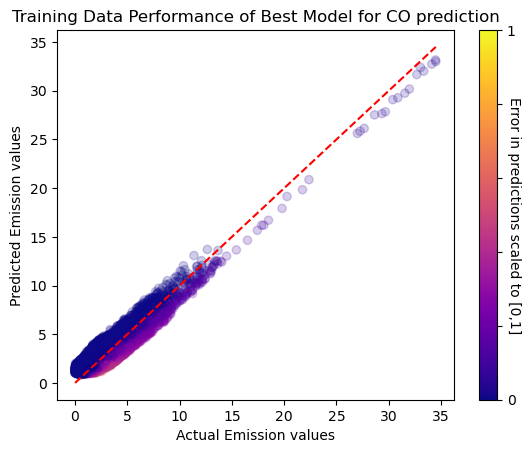

<Figure size 640x480 with 0 Axes>

In [33]:
fig = predict_plot(CO_train_y, ada_rf.predict(CO_train_scaled), "Training Data Performance of Best Model for CO prediction")
fig_save(fig, "Training Data Performance of Best Model for CO prediction")

C:\Users\spect\AppData\Local\Temp\ipykernel_2344\564416496.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


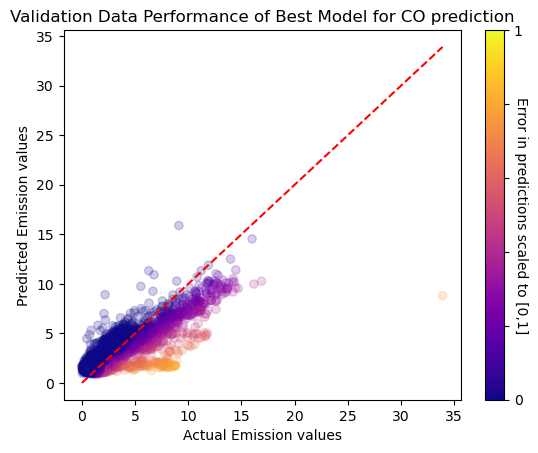

<Figure size 640x480 with 0 Axes>

In [34]:
fig = predict_plot(CO_val_y, ada_rf.predict(CO_val_scaled), "Validation Data Performance of Best Model for CO prediction")
fig_save(fig, "Validation Data Performance of Best Model for CO prediction")

C:\Users\spect\AppData\Local\Temp\ipykernel_2344\564416496.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


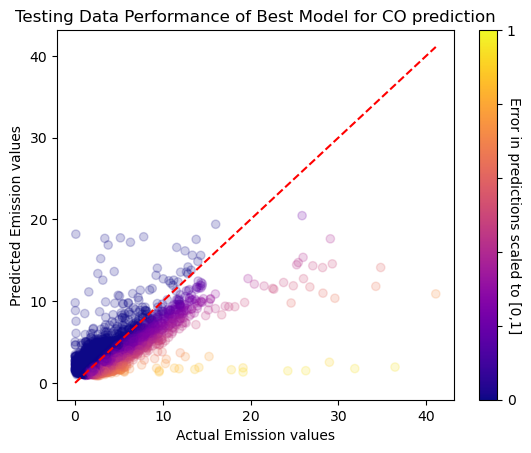

<Figure size 640x480 with 0 Axes>

In [35]:
fig = predict_plot(CO_test_y, ada_rf.predict(CO_test_scaled), "Testing Data Performance of Best Model for CO prediction")
fig_save(fig, "Testing Data Performance of Best Model for CO prediction")

# ------------------------------------------------NOX---------------------------------------------------------

# 2. Training for prediction of NOx emission amount

In [12]:
NOX_train_X = df_train.drop(["CO", "NOX"], axis = 1)
NOX_train_y = df_train["NOX"]

In [13]:
NOX_val_X = df_val.drop(["CO", "NOX"], axis = 1)
NOX_val_y = df_val["NOX"]

In [14]:
print(f"No. of entries in training set: {len(NOX_train_X)}")

No. of entries in training set: 15023


In [15]:
NOX_test_X = df_test.drop(["CO", "NOX"], axis = 1)
NOX_test_y = df_test["NOX"]

In [16]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()

NOX_train_scaled = stdscaler.fit_transform(NOX_train_X)
NOX_train_scaled = pd.DataFrame(data = NOX_train_scaled, columns = list(NOX_train_X.columns), index = np.arange(len(NOX_train_scaled)))

NOX_val_scaled = stdscaler.transform(NOX_val_X)
NOX_val_scaled = pd.DataFrame(data = NOX_val_scaled, columns = list(NOX_val_X.columns), index = np.arange(len(NOX_val_scaled)))

NOX_test_scaled = stdscaler.transform(NOX_test_X)
NOX_test_scaled = pd.DataFrame(data = NOX_test_scaled, columns = list(NOX_test_X.columns), index = np.arange(len(NOX_test_scaled)))



In [17]:
NOX_train_scaled.head()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0 -1.740832  0.859194  0.330572 -0.822801 -0.345745  0.143474  0.563181   
1 -1.779734  0.796769  0.371168 -0.829262 -0.352457  0.137390  0.591254   
2 -1.831062  0.812375  0.416331 -0.813573 -0.343108  0.161727  0.609119   
3 -1.852309  0.796769  0.458087 -0.816210 -0.362045  0.161727  0.606567   
4 -1.851253  0.718739  0.439818 -0.819769 -0.360607  0.125222  0.584874   

        TEY       CDP     Year  
0  0.029509 -0.185913 -1.01455  
1  0.029509 -0.191354 -1.01455  
2  0.056700 -0.055325 -1.01455  
3  0.052273 -0.102482 -1.01455  
4  0.029509 -0.175030 -1.01455

In [18]:
NOX_val_scaled.head()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0 -1.108296  1.077678  0.808082 -2.382572 -1.499468 -2.448326 -0.543151   
1 -1.118781  1.046466  0.784304 -2.408281 -1.510734 -2.673435 -0.826433   
2 -1.140543  1.030860  0.779520 -2.392196 -1.496591 -2.606511 -0.758803   
3 -1.161961  0.952830  0.752117 -2.396020 -1.496112 -2.843788 -1.088023   
4 -1.156125  0.921618  0.723773 -2.367147 -1.489879 -2.454410 -0.531667   

        TEY       CDP      Year  
0 -1.520392 -1.395662  2.985867  
1 -1.579201 -1.388407  2.985867  
2 -1.554539 -1.414706  2.985867  
3 -1.601333 -1.491789  2.985867  
4 -1.524818 -1.486348  2.985867

## 2.1 First trying Linear models

### 2.1.1 Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
NOX_lin_reg = LinearRegression()
NOX_lin_reg.fit(NOX_train_scaled, NOX_train_y)

LinearRegression()

In [29]:
from sklearn.metrics import mean_squared_error
mean = mean_squared_error(NOX_train_y, NOX_lin_reg.predict(NOX_train_scaled))
print(f"Linear Regression Mean Squared Error on training dataset: {mean}")
print(f"Linear Regression Mean Error on training dataset: {np.sqrt(mean)}")

Linear Regression Mean Squared Error on training dataset: 47.52568017501722
Linear Regression Mean Error on training dataset: 6.893887160014821


### 2.1.2 Ridge Regresssion

In [31]:
from sklearn.linear_model import Ridge
NOX_ridge = Ridge()
NOX_ridge.fit(NOX_train_scaled, NOX_train_y)

from sklearn.metrics import mean_squared_error
mean = mean_squared_error(NOX_train_y, NOX_ridge.predict(NOX_train_scaled))
print(f"Linear Regression Mean Squared Error on training dataset: {mean}")
print(f"Linear Regression Mean Error on training dataset: {np.sqrt(mean)}")

Linear Regression Mean Squared Error on training dataset: 47.53863756431766
Linear Regression Mean Error on training dataset: 6.894826869785612


### 2.1.3 Lasso Regression

In [34]:
from sklearn.linear_model import Lasso
NOX_lasso = Lasso()
NOX_lasso.fit(NOX_train_scaled, NOX_train_y)

from sklearn.metrics import mean_squared_error
mean = mean_squared_error(NOX_train_y, NOX_lasso.predict(NOX_train_scaled))
print(f"Linear Regression Mean Squared Error on training dataset: {mean}")
print(f"Linear Regression Mean Error on training dataset: {np.sqrt(mean)}")

Linear Regression Mean Squared Error on training dataset: 60.62183533396953
Linear Regression Mean Error on training dataset: 7.786002525941636


## 2.2 Trying Support Vector Machines

In [20]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

### 2.2.1 Polynomial Kernel

#### 2.2.1.1 Degree = 2

In [42]:
NOX_svr_poly_2 = SVR(kernel = "poly", degree = 2)
NOX_svr_poly_2.fit(NOX_train_scaled, NOX_train_y)
mean = mean_squared_error(NOX_train_y, NOX_svr_poly_2.predict(NOX_train_scaled))
print(f"SVM Squared Error on training dataset: {mean}")
print(f"SVM Error on training dataset: {np.sqrt(mean)}")

SVM Squared Error on training dataset: 65.14813650963531
SVM Error on training dataset: 8.071439556215193


#### 2.2.1.1 Degree = 3

In [21]:
NOX_svr_poly_3 = SVR(kernel = "poly")
NOX_svr_poly_3.fit(NOX_train_scaled, NOX_train_y)
mean = mean_squared_error(NOX_train_y, NOX_svr_poly_3.predict(NOX_train_scaled))
print(f"SVM Squared Error on training dataset: {mean}")
print(f"SVM Error on training dataset: {np.sqrt(mean)}")

SVM Squared Error on training dataset: 25.6984929410413
SVM Error on training dataset: 5.069368100763773


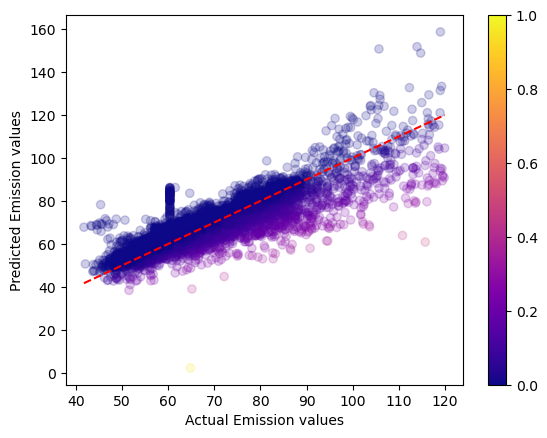

In [43]:
predict_plot(NOX_train_y, NOX_svr_poly_3.predict(NOX_train_scaled))

#### 2.2.1.2 Degree = 4

In [39]:
NOX_svr_poly_4 = SVR(kernel = "poly", degree = 4)
NOX_svr_poly_4.fit(NOX_train_scaled, NOX_train_y)
mean = mean_squared_error(NOX_train_y, NOX_svr_poly_4.predict(NOX_train_scaled))
print(f"SVM Squared Error on training dataset: {mean}")
print(f"SVM Error on training dataset: {np.sqrt(mean)}")

SVM Squared Error on training dataset: 43.11794352694218
SVM Error on training dataset: 6.566425475625394


#### 2.2.1.3 Degree = 5

In [40]:
NOX_svr_poly_5 = SVR(kernel = "poly", degree = 5)
NOX_svr_poly_5.fit(NOX_train_scaled, NOX_train_y)
mean = mean_squared_error(NOX_train_y, NOX_svr_poly_5.predict(NOX_train_scaled))
print(f"SVM Squared Error on training dataset: {mean}")
print(f"SVM Error on training dataset: {np.sqrt(mean)}")

SVM Squared Error on training dataset: 27.693743585185164
SVM Error on training dataset: 5.26248454488801


In [54]:
exh_feat_svr_poly_3 = exh_feature_sel(NOX_svr_poly_3, NOX_train_scaled, NOX_train_y, 
                                     list(NOX_train_X.columns))
exh_feat_svr_poly_3

Features: 912/912

['AT', 'AH', 'GTEP', 'TAT']

### 2.2.2 Gaussian Radial Basis Function Kernel (RBF)

In [25]:
NOX_svr_rbf = SVR(kernel = "rbf")
NOX_svr_rbf.fit(NOX_train_scaled, NOX_train_y)
mean = mean_squared_error(NOX_train_y, NOX_svr_rbf.predict(NOX_train_scaled))
print(f"SVM Squared Error on training dataset: {mean}")
print(f"SVM Error on training dataset: {np.sqrt(mean)}")

SVM Squared Error on training dataset: 16.944155847739033
SVM Error on training dataset: 4.1163279567764075


Features: 912/912

4.260709323405697


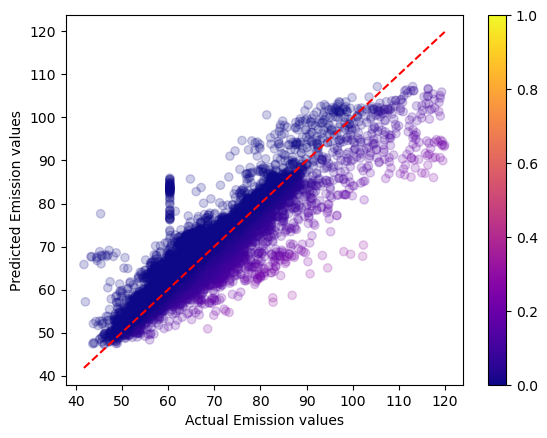

In [27]:
exh_feat_rbf = exh_feature_sel(NOX_svr_rbf, NOX_train_scaled, NOX_train_y, 
                                     list(NOX_train_X.columns))
exh_feat_rbf

X = NOX_train_X.loc[:,exh_feat_rbf]
X = StandardScaler().fit_transform(X)
model = SVR(kernel = "rbf")
model.fit(X, NOX_train_y)
print(np.sqrt(mean_squared_error(NOX_train_y, model.predict(X))))
predict_plot(NOX_train_y, model.predict(X))

In [28]:
exh_feat_rbf

['AT', 'AH', 'AFDP', 'TIT', 'TAT', 'TEY', 'CDP']

## 2.3 Trying Random Forest Regressors

In [29]:
from sklearn.ensemble import RandomForestRegressor
NOX_rf = RandomForestRegressor()
NOX_rf.fit(NOX_train_scaled, NOX_train_y)
mean = mean_squared_error(NOX_train_y, NOX_rf.predict(NOX_train_scaled))
print(f"Random Forest Squared Error on training dataset: {mean}")
print(f"Random Forest Error on training dataset: {np.sqrt(mean)}")

Random Forest Squared Error on training dataset: 1.520307715322728
Random Forest Error on training dataset: 1.2330075893208152


Features: 912/912

1.4167753313488443


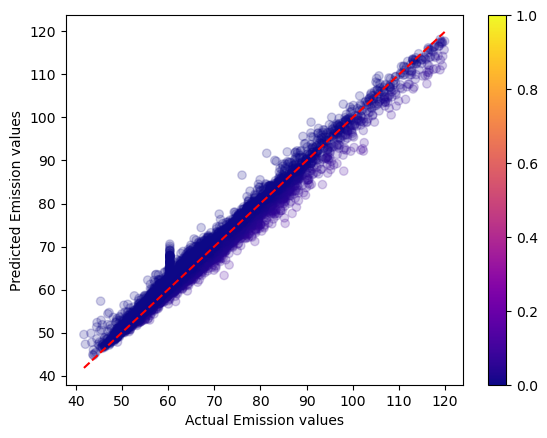

['AT', 'AH', 'TIT', 'TAT', 'TEY', 'CDP', 'Year']

In [33]:
exh_feat_rfr = exh_feature_sel(NOX_rf, NOX_train_scaled, NOX_train_y, 
                                     list(NOX_train_X.columns))

X = NOX_train_X.loc[:,exh_feat_rfr]
X = StandardScaler().fit_transform(X)
model = RandomForestRegressor()
model.fit(X, NOX_train_y)
print(np.sqrt(mean_squared_error(NOX_train_y, model.predict(X))))
predict_plot(NOX_train_y, model.predict(X))

exh_feat_rfr

## 2.4 Trying Multiple Layer Perceptrons

In [34]:
from sklearn.neural_network import MLPRegressor
NOX_mlp = MLPRegressor(activation = "logistic", max_iter = 3000)
NOX_mlp.fit(NOX_train_scaled, NOX_train_y)

MLPRegressor(activation='logistic', max_iter=3000)

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(NOX_train_y, NOX_mlp.predict(NOX_train_scaled))

2.1703450310980097

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Proje

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Proje

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Proje

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Proje

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Proje

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Proje

4.200621666332829


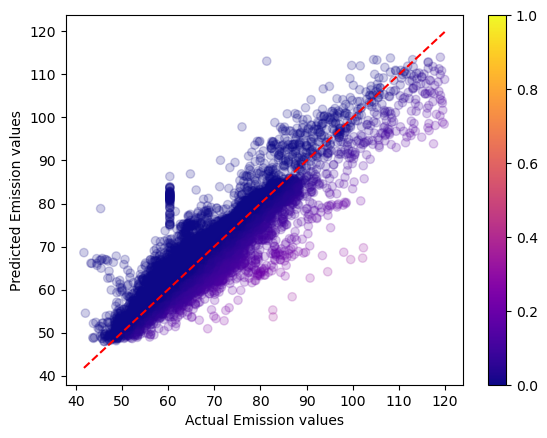

In [38]:
exh_feat_mlp = exh_feature_sel(NOX_mlp, NOX_train_scaled, NOX_train_y, list(NOX_train_X.columns))
exh_feat_mlp

X = NOX_train_X.loc[:,exh_feat_mlp]
X = StandardScaler().fit_transform(X)
model = MLPRegressor(activation = "logistic", max_iter = 2000)
model.fit(X, NOX_train_y)
print(np.sqrt(mean_squared_error(NOX_train_y, model.predict(X))))
predict_plot(NOX_train_y, model.predict(X))

In [39]:
exh_feat_mlp

['AT', 'AH', 'TIT', 'TEY', 'CDP']

## 2.5 Trying KNNRegressor model

In [20]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(NOX_train_scaled, NOX_train_y)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(NOX_train_y, knn_reg.predict(NOX_train_scaled))

1.731034094388604

In [23]:
exh_feat_knn = exh_feature_sel(knn_reg, NOX_train_scaled, NOX_train_y, 
                                     list(NOX_train_X.columns), min_features = 5, max_features=7)

X = NOX_train_X.loc[:,exh_feat_knn]
X = StandardScaler().fit_transform(X)
model = KNeighborsRegressor()
model.fit(X, NOX_train_y)
print(np.sqrt(mean_squared_error(NOX_train_y, model.predict(X))))
predict_plot(NOX_train_y, model.predict(X))

exh_feat_knn

Features: 582/582

NameError: name 'mean_squared_error' is not defined

In [24]:
exh_feat_knn

['AT', 'AH', 'TIT', 'TAT', 'TEY']

# 3.0 Implementing feature selection

Creating a custom transformer to use alongwith column transformer to train the models on the best features selected through feature selection

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class nothing_transformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass
  def fit(self, X, y = None):
    return self
  def transform(self, X, y = None):
    return X

In [20]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

## 3.1 Implementing feature selection on SVR poly 3

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ff = list(NOX_train_X.columns)
best_f_svr_poly_3 = ['AT', 'AH', 'GTEP', 'TAT']
best_features_svr_poly_3 = [ff.index(i) for i in best_f_svr_poly_3]

CT_svr_poly_3 = ColumnTransformer([("best_features_svr_poly_3", nothing_transformer(), best_features_svr_poly_3)], remainder = "drop")

pipe_svr_poly_3 = Pipeline([
    ("CT_svr_poly_3", CT_svr_poly_3),
    ("model_svr_poly_3", SVR(kernel = "poly", degree = 3, C = 1))
])

pipe_svr_poly_3.fit(NOX_train_scaled, NOX_train_y)


Pipeline(steps=[('CT_svr_poly_3',
                 ColumnTransformer(transformers=[('best_features_svr_poly_3',
                                                  nothing_transformer(),
                                                  [0, 2, 4, 6])])),
                ('model_svr_poly_3', SVR(C=1, kernel='poly'))])

In [22]:
mean_absolute_error(NOX_val_y, pipe_svr_poly_3.predict(NOX_val_scaled))

6.502511940651003

In [23]:
r2_score(NOX_val_y, pipe_svr_poly_3.predict(NOX_val_scaled))

0.4700175939012947

In [24]:
mean_absolute_error(NOX_test_y, pipe_svr_poly_3.predict(NOX_test_scaled))

12.53492939624622

## 3.2 Implementing feature selection on SVR rbf kernel

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ff = list(NOX_train_X.columns)
best_f_svr_rbf = ['AT', 'AH', 'AFDP', 'TIT', 'TAT', 'TEY', 'CDP']
best_features_svr_rbf = [ff.index(i) for i in best_f_svr_rbf]

CT_svr_rbf = ColumnTransformer([("best_features_svr_rbf", nothing_transformer(), best_features_svr_rbf)], remainder = "drop")

pipe_svr_rbf = Pipeline([
    ("CT_svr_rbf", CT_svr_rbf),
    ("model_svr_rbf", SVR(kernel = "rbf", C = 1))
])

pipe_svr_rbf.fit(NOX_train_scaled, NOX_train_y)


Pipeline(steps=[('CT_svr_rbf',
                 ColumnTransformer(transformers=[('best_features_svr_rbf',
                                                  nothing_transformer(),
                                                  [0, 2, 3, 5, 6, 7, 8])])),
                ('model_svr_rbf', SVR(C=1))])

In [26]:
mean_absolute_error(NOX_val_y, pipe_svr_rbf.predict(NOX_val_scaled))

5.709319010270112

In [27]:
r2_score(NOX_val_y, pipe_svr_rbf.predict(NOX_val_scaled))

0.5807208616100408

In [28]:
mean_absolute_error(NOX_test_y, pipe_svr_rbf.predict(NOX_test_scaled))

10.323901300427213

In [101]:
r2_score(NOX_test_y, pipe_svr_rbf.predict(NOX_test_scaled))

-0.16995470586108619

## 3.3 Implementing feature selection on Random Forest

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ff = list(NOX_train_X.columns)
best_f_rf = ['AT', 'AH', 'TIT', 'TAT', 'TEY', 'CDP', 'Year']
best_features_rf = [ff.index(i) for i in best_f_rf ]
CT_rf = ColumnTransformer([("best_features_rf", nothing_transformer(), best_features_rf)], remainder = "drop")

pipe_rf = Pipeline([
    ("CT_rf", CT_rf),
    ("model_rf", RandomForestRegressor(
        n_estimators = 1800,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 50,
 bootstrap = True
    ))
])

pipe_rf.fit(NOX_train_scaled, NOX_train_y)


Pipeline(steps=[('CT_rf',
                 ColumnTransformer(transformers=[('best_features_rf',
                                                  nothing_transformer(),
                                                  [0, 2, 5, 6, 7, 8, 9])])),
                ('model_rf',
                 RandomForestRegressor(max_depth=50, max_features='sqrt',
                                       n_estimators=1800))])

In [30]:
mean_absolute_error(NOX_val_y, pipe_rf.predict(NOX_val_scaled))

5.100084186360888

In [31]:
r2_score(NOX_val_y, pipe_rf.predict(NOX_val_scaled))

0.6615153637325579

In [32]:
mean_absolute_error(NOX_test_y, pipe_rf.predict(NOX_test_scaled))

11.775592935672815

In [98]:
r2_score(NOX_test_y, pipe_rf.predict(NOX_test_scaled))

-0.47704842649250856

## 3.4 Implementing feature selection on Multi Layer Perceptron

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ff = list(NOX_train_X.columns)
best_f_mlp = ['AT', 'AH', 'TIT', 'TEY', 'CDP']
best_features_mlp = [ff.index(i) for i in best_f_mlp]

CT_mlp = ColumnTransformer([("best_features_mlp", nothing_transformer(), best_features_mlp)], remainder = "drop")

pipe_mlp = Pipeline([
    ("CT_mlp", CT_mlp),
    ("model_mlp", MLPRegressor(max_iter = 2000,
                            solver = 'adam',
 learning_rate = 'constant',
 hidden_layer_sizes = (10, 30, 10),
 alpha = 0.0001,
 activation = 'tanh'
                              ))
])

pipe_mlp.fit(NOX_train_scaled, NOX_train_y)


Pipeline(steps=[('CT_mlp',
                 ColumnTransformer(transformers=[('best_features_mlp',
                                                  nothing_transformer(),
                                                  [0, 2, 5, 7, 8])])),
                ('model_mlp',
                 MLPRegressor(activation='tanh',
                              hidden_layer_sizes=(10, 30, 10),
                              max_iter=2000))])

In [34]:
mean_absolute_error(NOX_val_y, pipe_mlp.predict(NOX_val_scaled))

4.976916960934819

In [35]:
r2_score(NOX_val_y, pipe_mlp.predict(NOX_val_scaled))

0.6579665068972245

In [36]:
mean_absolute_error(NOX_test_y, pipe_mlp.predict(NOX_test_scaled))

11.885199095239273

In [97]:
r2_score(NOX_test_y, pipe_mlp.predict(NOX_test_scaled))

-0.62132692487

## 3.5 Implementing feature selection on KNeighborsRegressor

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

ff = list(NOX_train_X.columns)
best_f_knn = ['AT', 'AH', 'TIT', 'TAT', 'TEY']
best_features_knn = [ff.index(i) for i in best_f_knn]

CT_knn = ColumnTransformer([("best_features_knn", nothing_transformer(), best_features_knn)], remainder = "drop")

pipe_knn = Pipeline([
    ("CT_knn", CT_knn),
    ("model_knn", KNeighborsRegressor(
    p = 2, 
        n_neighbors = 20,
        leaf_size = 12
    ))
])

pipe_knn.fit(NOX_train_scaled, NOX_train_y)


Pipeline(steps=[('CT_knn',
                 ColumnTransformer(transformers=[('best_features_knn',
                                                  nothing_transformer(),
                                                  [0, 2, 5, 6, 7])])),
                ('model_knn',
                 KNeighborsRegressor(leaf_size=12, n_neighbors=20))])

In [38]:
mean_absolute_error(NOX_val_y, pipe_knn.predict(NOX_val_scaled))

5.167229674171445

In [39]:
r2_score(NOX_val_y, pipe_knn.predict(NOX_val_scaled))

0.6402050661358968

In [40]:
mean_absolute_error(NOX_test_y, pipe_knn.predict(NOX_test_scaled))

10.90842146197222

# 4.0 Hyperparameter tuning for top 5 models

## 4.1 Tuning SVR polynomial degree 3 model

In [ ]:
model = pipe_svr_poly_3

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "model_svr_poly_3__C": np.logspace(-3,2,6)
}

rand_search_svr_poly_3 = RandomizedSearchCV(model, param_grid, n_iter = 15, cv = 2, random_state = 42, verbose = 5)
rand_search_svr_poly_3.fit(NOX_train_scaled, NOX_train_y)


In [42]:
rand_search_svr_poly_3.best_params_

{'model_svr_poly_3__C': 1.0}

## 4.2 Tuning RF

In [43]:
model = pipe_rf

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'model_rf__bootstrap': [True, False],
 'model_rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'model_rf__max_features': ['auto', 'sqrt'],
 'model_rf__min_samples_leaf': [1, 2, 4],
 'model_rf__min_samples_split': [2, 5, 10],
 'model_rf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rand_search_rf = RandomizedSearchCV(model, param_grid, n_iter = 100, cv = 2, random_state = 42, verbose = 5)
rand_search_rf.fit(NOX_train_scaled, NOX_train_y)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.784 total time=  15.3s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.728 total time=  14.6s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.786 total time=  14.1s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.746 total time=  14.8s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.779 total time=  39.5s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.747 total time=  37.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.779 total time=   6.5s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.745 total time=   7.1s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=1200;, score=0.786 total time=  11.8s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=1200;, score=0.748 total time=  15.3s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1600;, score=0.787 total time=  24.4s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.780 total time=  46.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.747 total time=  47.2s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.781 total time=   9.5s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.740 total time=   9.7s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1000;, score=0.783 total time=  13.5s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_sample

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.650 total time= 1.2min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.657 total time= 1.3min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=2000;, score=0.685 total time= 1.2min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=2000;, score=0.659 total time= 1.3min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.675 total time= 1.3min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.658 total time= 1.5min
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1000;, score=0.786 total time=  11.0s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1000;, score=0.737 total time=   9.9s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.778 total time=   8.3s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_sam

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.641 total time=  55.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.634 total time=  56.2s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.783 total time=  20.2s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.743 total time=  20.6s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=70, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.787 total time=  22.9s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=70, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_sampl

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1000;, score=0.781 total time=  23.6s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1000;, score=0.749 total time=  24.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.685 total time=   7.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.659 total time=   7.9s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=70, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.784 total time=   3.9s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=70, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.745 total time=   3.8s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1600;, score=0.780 total time=  26.1s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.629 total time= 1.4min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.648 total time= 1.5min
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=200;, score=0.785 total time=   1.8s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=200;, score=0.736 total time=   1.9s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.787 total time=  13.6s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_sampl

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.778 total time=  10.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.746 total time=  10.4s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1600;, score=0.781 total time=  25.1s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1600;, score=0.747 total time=  28.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=400;, score=0.780 total time=  11.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=400;, score=0.746 total time=  11.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=2000;, score=0.685 total time= 1.3min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=2000;, score=0.659 total time= 1.4min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=1000;, score=0.782 total time=  20.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=1000;, score=0.748 total time=  20.2s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.779 total time=   3.1s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.749 total time=   3.3s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=600;, score=0.785 total time=   5.9s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samp

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=800;, score=0.712 total time=  23.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=800;, score=0.680 total time=  23.8s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=200;, score=0.629 total time=   8.6s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=200;, score=0.646 total time=   9.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=600;, score=0.779 total time=  15.8s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=600;, score=0.745 total time=  16.6s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.780 total time=   4.6s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.750 total time=   4.7s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1800;, score=0.786 total time=  24.4s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1800;, score=0.751 total time=  24.1s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1600;, score=0.786 total time=  14.5s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1000;, score=0.780 total time=  24.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1000;, score=0.745 total time=  25.6s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=200;, score=0.783 total time=   3.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=200;, score=0.751 total time=   3.8s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.787 total time=  21.8s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.746 total time=  22.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.644 total time= 1.2min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.649 total time= 1.4min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=40, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.780 total time=  53.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=40, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.746 total time=  47.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.779 total time=  19.5s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.746 total time=  16.8s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.629 total time= 1.5min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.646 total time= 1.6min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1800;, score=0.783 total time=  35.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1800;, score=0.748 total time=  35.6s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1600;, score=0.650 total time= 1.1min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1600;, score=0.657 total time= 1.1min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.780 total time=  41.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.749 total time=  44.4s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=1600;, score=0.787 total time=  15.0s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=1600;, score=0.743 total time=  15.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.629 total time= 1.4min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.646 total time= 1.7min
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=800;, score=0.781 total time=  12.6s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=800;, score=0.745 total time=  13.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.780 total time=  52.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.746 total time=  55.6s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=200;, score=0.778 total time=   3.3s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=200;, score=0.750 total time=   3.5s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=60, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=1400;, score=0.782 total time=  20.9s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=60, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_sa

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.685 total time=  15.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=400;, score=0.659 total time=  15.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1200;, score=0.780 total time=  27.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1200;, score=0.749 total time=  30.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=2000;, score=0.700 total time= 1.0min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=2000;, score=0.664 total time= 1.0min
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.783 total time=  25.4s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.747 total time=  26.1s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.779 total time=   3.3s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_sa

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.783 total time=  12.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.749 total time=  12.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=600;, score=0.781 total time=  15.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=600;, score=0.745 total time=  16.0s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.788 total time=   8.1s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=90, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=600;, score=0.742 total time=   8.1s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1200;, score=0.781 total time=  19.2s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_sample

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1400;, score=0.700 total time=  42.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1400;, score=0.664 total time=  42.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.776 total time=   6.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=200;, score=0.745 total time=   6.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.703 total time= 1.0min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=2000;, score=0.674 total time= 1.0min
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1200;, score=0.781 total time=  19.1s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=sqrt, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1200;, score=0.749 total time=  19.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.700 total time=  36.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.664 total time=  36.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=600;, score=0.781 total time=  13.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=600;, score=0.749 total time=  14.3s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.779 total time=  46.8s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.747 total time=  48.6s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.694 total time= 1.2min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.660 total time= 1.3min
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=800;, score=0.787 total time=   8.0s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=None, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=2, model_rf__n_estimators=800;, score=0.740 total time=   7.9s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1600;, score=0.786 total time=  21.7s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samp

D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.779 total time=  32.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=50, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1200;, score=0.747 total time=  32.7s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.786 total time=  16.9s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=100, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.734 total time=  17.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1000;, score=0.642 total time=  43.0s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=70, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=1000;, score=0.633 total time=  45.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.694 total time= 1.1min


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=10, model_rf__n_estimators=1800;, score=0.660 total time= 1.2min
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.783 total time=  18.5s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=10, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.730 total time=  18.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.780 total time=  41.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=80, model_rf__max_features=auto, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1800;, score=0.749 total time=  42.8s
[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=20, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.779 total time=  29.1s
[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=20, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=2000;, score=0.743 total time=  30.4s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=200;, score=0.780 total time=   4.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=30, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=200;, score=0.748 total time=   4.8s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.629 total time=  59.5s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=20, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.648 total time= 1.1min
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.785 total time=  10.0s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=10, model_rf__max_features=sqrt, model_rf__min_samples_leaf=4, model_rf__min_samples_split=5, model_rf__n_estimators=1400;, score=0.730 total time=  10.1s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=200;, score=0.779 total time=   4.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=90, model_rf__max_features=auto, model_rf__min_samples_leaf=2, model_rf__min_samples_split=10, model_rf__n_estimators=200;, score=0.747 total time=   4.9s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1000;, score=0.625 total time=  48.2s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=60, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=2, model_rf__n_estimators=1000;, score=0.649 total time=  51.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/2] END model_rf__bootstrap=False, model_rf__max_depth=100, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=600;, score=0.650 total time=  23.7s


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/2] END model_rf__bootstrap=False, model_rf__max_depth=100, model_rf__max_features=auto, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=600;, score=0.656 total time=  31.0s
[CV 1/2] END model_rf__bootstrap=True, model_rf__max_depth=40, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1200;, score=0.786 total time=  12.0s
[CV 2/2] END model_rf__bootstrap=True, model_rf__max_depth=40, model_rf__max_features=sqrt, model_rf__min_samples_leaf=1, model_rf__min_samples_split=10, model_rf__n_estimators=1200;, score=0.743 total time=  12.6s


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('CT_rf',
                                              ColumnTransformer(transformers=[('best_features_rf',
                                                                               nothing_transformer(),
                                                                               [0,
                                                                                2,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8,
                                                                                9])])),
                                             ('model_rf',
                                              RandomForestRegressor())]),
                   n_iter=100,
                   param_distributions={'model_rf__bootstrap': [True, False],
                                        'model_rf__max_depth': [10, 20, 30, 40,
                                                                50, 60, 70, 80,
                                                                90, 100, None],
                                        'model_rf__max_features': ['auto',
                                                                   'sqrt'],
                                        'model_rf__min_samples_leaf': [1, 2, 4],
                                        'model_rf__min_samples_split': [2, 5,
                                                                        10],
                                        'model_rf__n_estimators': [200, 400,
                                                                   600, 800,
                                                                   1000, 1200,
                                                                   1400, 1600,
                                                                   1800,
                                                                   2000]},
                   random_state=42, verbose=5)

In [44]:
rand_search_rf.best_params_

{'model_rf__n_estimators': 1800,
 'model_rf__min_samples_split': 2,
 'model_rf__min_samples_leaf': 1,
 'model_rf__max_features': 'sqrt',
 'model_rf__max_depth': 50,
 'model_rf__bootstrap': True}

## 4.3 Tuning MLP

In [45]:
model = pipe_mlp

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'model_mlp__hidden_layer_sizes': [(10,30,10),(20,)],
    'model_mlp__activation': ['tanh', 'relu'],
    'model_mlp__solver': ['sgd', 'adam'],
    'model_mlp__alpha': [0.0001, 0.05],
    'model_mlp__learning_rate': ['constant','adaptive'],
}

rand_search_mlp = RandomizedSearchCV(model, param_grid, n_iter = 100, cv = 2, random_state = 42, verbose = 5)
rand_search_mlp.fit(NOX_train_scaled, NOX_train_y)


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV 1/2] END model_mlp__activation=tanh, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(10, 30, 10), model_mlp__learning_rate=constant, model_mlp__solver=sgd;, score=-0.008 total time=   0.6s
[CV 2/2] END model_mlp__activation=tanh, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(10, 30, 10), model_mlp__learning_rate=constant, model_mlp__solver=sgd;, score=-0.010 total time=   0.5s
[CV 1/2] END model_mlp__activation=tanh, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(10, 30, 10), model_mlp__learning_rate=constant, model_mlp__solver=adam;, score=0.811 total time=  19.0s
[CV 2/2] END model_mlp__activation=tanh, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(10, 30, 10), model_mlp__learning_rate=constant, model_mlp__solver=adam;, score=0.760 total time=  17.0s
[CV 1/2] END model_mlp__activation=tanh, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(10, 30, 10), model_mlp__learning_rate=

[CV 1/2] END model_mlp__activation=relu, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(20,), model_mlp__learning_rate=constant, model_mlp__solver=adam;, score=0.795 total time=   8.3s
[CV 2/2] END model_mlp__activation=relu, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(20,), model_mlp__learning_rate=constant, model_mlp__solver=adam;, score=0.739 total time=   5.0s
[CV 1/2] END model_mlp__activation=relu, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(20,), model_mlp__learning_rate=adaptive, model_mlp__solver=sgd;, score=0.798 total time=   3.8s
[CV 2/2] END model_mlp__activation=relu, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(20,), model_mlp__learning_rate=adaptive, model_mlp__solver=sgd;, score=0.730 total time=   2.8s
[CV 1/2] END model_mlp__activation=relu, model_mlp__alpha=0.0001, model_mlp__hidden_layer_sizes=(20,), model_mlp__learning_rate=adaptive, model_mlp__solver=adam;, score=0.803 total time=   7.1s
[CV 2/2] END model_mlp__activati

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('CT_mlp',
                                              ColumnTransformer(transformers=[('best_features_mlp',
                                                                               nothing_transformer(),
                                                                               [0,
                                                                                2,
                                                                                5,
                                                                                7,
                                                                                8])])),
                                             ('model_mlp',
                                              MLPRegressor(max_iter=2000))]),
                   n_iter=100,
                   param_distributions={'model_mlp__activation': ['tanh',
                                                                  'relu'],
                                        'model_mlp__alpha': [0.0001, 0.05],
                                        'model_mlp__hidden_layer_sizes': [(10,
                                                                           30,
                                                                           10),
                                                                          (20,)],
                                        'model_mlp__learning_rate': ['constant',
                                                                     'adaptive'],
                                        'model_mlp__solver': ['sgd', 'adam']},
                   random_state=42, verbose=5)

In [46]:
rand_search_mlp.best_params_

{'model_mlp__solver': 'adam',
 'model_mlp__learning_rate': 'constant',
 'model_mlp__hidden_layer_sizes': (10, 30, 10),
 'model_mlp__alpha': 0.0001,
 'model_mlp__activation': 'tanh'}

## 4.4 Tuning SVR rbf kernel model

In [47]:
model = pipe_svr_rbf

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "model_svr_rbf__C": np.logspace(-3,2,6)
}

rand_search_svr_rbf = RandomizedSearchCV(model, param_grid, n_iter = 15, cv = 2, random_state = 42, verbose = 5)
rand_search_svr_rbf.fit(NOX_train_scaled, NOX_train_y)


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 6 is smaller than n_iter=15. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END ............model_svr_rbf__C=0.001;, score=0.031 total time=   9.3s
[CV 2/2] END ...........model_svr_rbf__C=0.001;, score=-0.032 total time=   9.3s
[CV 1/2] END .............model_svr_rbf__C=0.01;, score=0.275 total time=   9.1s
[CV 2/2] END .............model_svr_rbf__C=0.01;, score=0.220 total time=  12.2s
[CV 1/2] END ..............model_svr_rbf__C=0.1;, score=0.701 total time=  11.7s
[CV 2/2] END ..............model_svr_rbf__C=0.1;, score=0.633 total time=  11.6s
[CV 1/2] END ..............model_svr_rbf__C=1.0;, score=0.787 total time=  11.0s
[CV 2/2] END ..............model_svr_rbf__C=1.0;, score=0.752 total time=   9.6s
[CV 1/2] END .............model_svr_rbf__C=10.0;, score=0.770 total time=   9.4s
[CV 2/2] END .............model_svr_rbf__C=10.0;, score=0.737 total time=   9.1s
[CV 1/2] END ............model_svr_rbf__C=100.0;, score=0.696 total time=  10.6s
[CV 2/2] END ............model_svr_rbf__C=100.0;,

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('CT_svr_rbf',
                                              ColumnTransformer(transformers=[('best_features_svr_rbf',
                                                                               nothing_transformer(),
                                                                               [0,
                                                                                2,
                                                                                3,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8])])),
                                             ('model_svr_rbf', SVR())]),
                   n_iter=15,
                   param_distributions={'model_svr_rbf__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
                   random_state=42, verbose=5)

In [48]:
rand_search_svr_rbf.best_params_

{'model_svr_rbf__C': 1.0}

## 4.5 Tuning KNN model

In [49]:
model = pipe_knn

from sklearn.model_selection import RandomizedSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(model_knn__leaf_size=leaf_size, model_knn__n_neighbors=n_neighbors, model_knn__p=p)

param_grid = hyperparameters

rand_search_knn = RandomizedSearchCV(model, param_grid, n_iter = 100, cv = 2, random_state = 42, verbose = 5)
rand_search_knn.fit(NOX_train_scaled, NOX_train_y)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2] END model_knn__leaf_size=8, model_knn__n_neighbors=5, model_knn__p=2;, score=0.755 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=8, model_knn__n_neighbors=5, model_knn__p=2;, score=0.720 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=39, model_knn__n_neighbors=15, model_knn__p=2;, score=0.780 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=39, model_knn__n_neighbors=15, model_knn__p=2;, score=0.731 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=20, model_knn__n_neighbors=24, model_knn__p=2;, score=0.784 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=20, model_knn__n_neighbors=24, model_knn__p=2;, score=0.728 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=20, model_knn__n_neighbors=6, model_knn__p=2;, score=0.761 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=20, model_knn__n_neighbors=6, model_knn__p=2;, score=0.724 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=22, m

[CV 2/2] END model_knn__leaf_size=3, model_knn__n_neighbors=13, model_knn__p=2;, score=0.731 total time=   0.1s
[CV 1/2] END model_knn__leaf_size=18, model_knn__n_neighbors=16, model_knn__p=2;, score=0.780 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=18, model_knn__n_neighbors=16, model_knn__p=2;, score=0.730 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=21, model_knn__n_neighbors=24, model_knn__p=1;, score=0.782 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=21, model_knn__n_neighbors=24, model_knn__p=1;, score=0.723 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=45, model_knn__n_neighbors=10, model_knn__p=2;, score=0.775 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=45, model_knn__n_neighbors=10, model_knn__p=2;, score=0.732 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=28, model_knn__n_neighbors=11, model_knn__p=2;, score=0.777 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=28, model_knn__n_neighbors=11, model_knn__p=2;, score=0.731 tot

[CV 2/2] END model_knn__leaf_size=36, model_knn__n_neighbors=1, model_knn__p=2;, score=0.617 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=4, model_knn__n_neighbors=11, model_knn__p=1;, score=0.775 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=4, model_knn__n_neighbors=11, model_knn__p=1;, score=0.727 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=42, model_knn__n_neighbors=14, model_knn__p=1;, score=0.778 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=42, model_knn__n_neighbors=14, model_knn__p=1;, score=0.728 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=24, model_knn__n_neighbors=11, model_knn__p=2;, score=0.777 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=24, model_knn__n_neighbors=11, model_knn__p=2;, score=0.731 total time=   0.0s
[CV 1/2] END model_knn__leaf_size=28, model_knn__n_neighbors=19, model_knn__p=1;, score=0.782 total time=   0.0s
[CV 2/2] END model_knn__leaf_size=28, model_knn__n_neighbors=19, model_knn__p=1;, score=0.725 total

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('CT_knn',
                                              ColumnTransformer(transformers=[('best_features_knn',
                                                                               nothing_transformer(),
                                                                               [0,
                                                                                2,
                                                                                5,
                                                                                6,
                                                                                7])])),
                                             ('model_knn',
                                              KNeighborsRegressor())]),
                   n_iter=100,
                   param_distributions={'model_knn__leaf_size': [1, 2, 3, 4, 5,
                                                                 6, 7, 8, 9, 10,
                                                                 11, 12, 13, 14,
                                                                 15, 16, 17, 18,
                                                                 19, 20, 21, 22,
                                                                 23, 24, 25, 26,
                                                                 27, 28, 29, 30, ...],
                                        'model_knn__n_neighbors': [1, 2, 3, 4,
                                                                   5, 6, 7, 8,
                                                                   9, 10, 11,
                                                                   12, 13, 14,
                                                                   15, 16, 17,
                                                                   18, 19, 20,
                                                                   21, 22, 23,
                                                                   24, 25, 26,
                                                                   27, 28, 29],
                                        'model_knn__p': [1, 2]},
                   random_state=42, verbose=5)

In [50]:
rand_search_knn.best_params_

{'model_knn__p': 2, 'model_knn__n_neighbors': 20, 'model_knn__leaf_size': 12}

# 5.0 Creating Ensemble Models

In [41]:
from sklearn.metrics import r2_score

## 5.1 Bagging model

In [42]:
## Creating Bagging models for SVM_poly_deg_5 (CO_svr_poly_5), SVM_rbf (CO_svr_rbf), 
## , and Multi_Layer_perceptrons (mlp) to create a Bagging Regressor

### 5.1.1 Bagging model for SVM polynomial kernel degree 3

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(base_estimator = pipe_svr_poly_3, n_estimators = 10)
bagging_model.fit(NOX_train_scaled, NOX_train_y)
mean_absolute_error(NOX_val_y, bagging_model.predict(NOX_val_scaled))

6.486445640485158

In [45]:
r2_score(NOX_val_y, bagging_model.predict(NOX_val_scaled))

0.47224805866284725

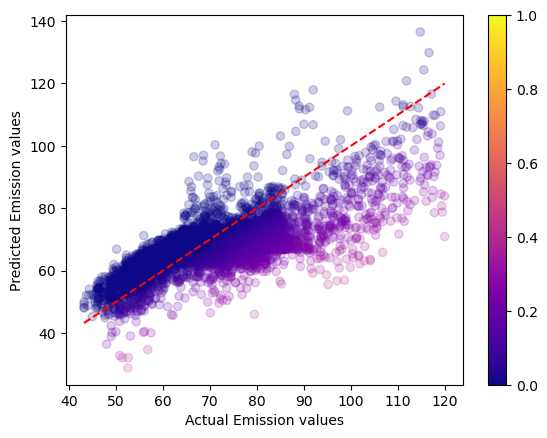

In [93]:
predict_plot(NOX_val_y, bagging_model.predict(NOX_val_scaled))

In [94]:
## Evaluating validation performance of Bagging SVR_poly_5 on validation set

score = np.sqrt(mean_squared_error(NOX_val_y, bagging_model.predict(NOX_val_scaled)))

print(f"Mean absolute error score of SVR_poly_3 on validation set is {score}")

Mean absolute error score of SVR_poly_3 on validation set is 8.748069701688442


### 5.1.2 Bagging model for SVM polynomial kernel rbf

In [46]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(base_estimator = pipe_svr_rbf, n_estimators = 10)
bagging_model.fit(NOX_train_scaled, NOX_train_y)
np.sqrt(mean_squared_error(NOX_train_y, bagging_model.predict(NOX_train_scaled)))

4.263692111417052

C:\Users\spect\AppData\Local\Temp\ipykernel_15200\564416496.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


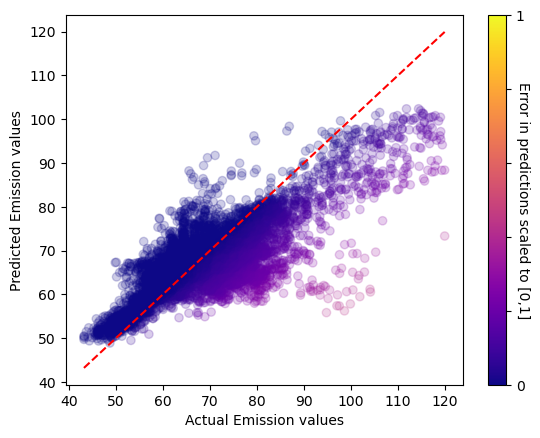

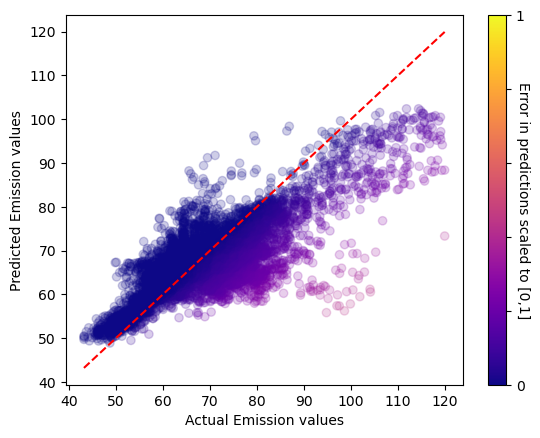

In [47]:
predict_plot(NOX_val_y, bagging_model.predict(NOX_val_scaled))

In [48]:
## Evaluating validation performance of Bagging SVR_rbf on validation set

score = np.sqrt(mean_squared_error(NOX_val_y, bagging_model.predict(NOX_val_scaled)))

print(f"Mean absolute error score of SVR_rbf on validation set is {score}")

Mean absolute error score of SVR_rbf on validation set is 7.796272260318648


In [49]:
r2_score(NOX_val_y, bagging_model.predict(NOX_val_scaled))

0.5812699639240377

### 5.1.3 Bagging model for MLP algorithm

In [50]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(base_estimator = pipe_mlp, n_estimators = 10)
bagging_model.fit(NOX_train_scaled, NOX_train_y)
np.sqrt(mean_squared_error(NOX_train_y, bagging_model.predict(NOX_train_scaled)))

4.076763711187578

In [ ]:
predict_plot(NOX_val_y, bagging_model.predict(NOX_val_scaled))

In [51]:
## Evaluating validation performance of Bagging mlp on validation set

score = np.sqrt(mean_squared_error(NOX_val_y, bagging_model.predict(NOX_val_scaled)))

print(f"Mean absolute error score of mlp on validation set is {score}")

Mean absolute error score of mlp on validation set is 7.068045693299096


In [ ]:
r2_score(NOX_val_y, bagging_model.predict(NOX_val_scaled))

##### Bagging models don't work as they don't have good performance

## 5.2 Voting Classifier 

In [64]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor([
#     ("svr_poly_5" ,pipe_svr_poly_5), 
#                            ("svr_rbf", pipe_svr_rbf), 
                           ("rf", pipe_rf),
                          ("mlp", pipe_mlp),
                         ("knn", pipe_knn),
#                         ("xgb", xgb)
])

voting.fit(NOX_train_scaled, NOX_train_y)

score = mean_absolute_error(NOX_val_y, voting.predict(NOX_val_scaled))

print(f"Mean absolute error score of Voting Classifier on validation set is {score}")

Mean absolute error score of Voting Classifier on validation set is 4.985034975527114


In [65]:
r2_score(NOX_val_y, voting.predict(NOX_val_scaled))

0.6649956512801172

In [66]:
mean_absolute_error(NOX_test_y, voting.predict(NOX_test_scaled))

11.641959893900633

In [99]:
r2_score(NOX_test_y, voting.predict(NOX_test_scaled))

-0.4806746660145811

## 5.3 Boosting Method

### 5.3.1 AdaBoost

#### 5.3.1.1 Implementing boosting on RF

In [69]:
from sklearn.ensemble import AdaBoostRegressor
ada_rf = AdaBoostRegressor(base_estimator = pipe_rf, n_estimators = 5)
ada_rf.fit(NOX_train_scaled, NOX_train_y)
mean_absolute_error(NOX_val_y, ada_rf.predict(NOX_val_scaled))

5.132757713373429

In [70]:
r2_score(NOX_val_y, ada_rf.predict(NOX_val_scaled))

0.6591793551760023

In [71]:
mean_absolute_error(NOX_test_y, ada_rf.predict(NOX_test_scaled))

11.832656580479437

#### 5.3.1.2 Implementing boosting on MLP

In [90]:
from sklearn.ensemble import AdaBoostRegressor
ada_mlp = AdaBoostRegressor(base_estimator = pipe_mlp, n_estimators = 5)
ada_mlp.fit(NOX_train_scaled, NOX_train_y)
mean_absolute_error(NOX_val_y, ada_mlp.predict(NOX_val_scaled))

5.054779875002842

In [93]:
r2_score(NOX_val_y, ada_mlp.predict(NOX_val_scaled))

0.6534104320759935

In [92]:
mean_absolute_error(NOX_test_y, ada_mlp.predict(NOX_test_scaled))

11.675011159417497

In [95]:
r2_score(NOX_test_y, ada_mlp.predict(NOX_test_scaled))

-0.5990719521599099

#### 5.3.1.3 Implementing boosting on KNN

In [1]:
from sklearn.ensemble import AdaBoostRegressor
ada_knn = AdaBoostRegressor(base_estimator = pipe_knn, n_estimators = 5)
ada_knn.fit(NOX_train_scaled, NOX_train_y)
mean_absolute_error(NOX_val_y, ada_knn.predict(NOX_val_scaled))

NameError: name 'pipe_knn' is not defined

In [ ]:
r2_score(NOX_val_y, ada_knn.predict(NOX_val_scaled))

### 5.3.2 Implementing Gradient Boosting using XGBoost

In [74]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [75]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(NOX_train_scaled, NOX_train_y
#         , eval_set = [(NOX_val_scaled, NOX_val_y)], early_stopping_rounds = 2
       )
mean_absolute_error(NOX_val_y, xgb.predict(NOX_val_scaled))

5.526079935045313

In [76]:
r2_score(NOX_val_y, xgb.predict(NOX_val_scaled))

0.6079651282031302

In [77]:
mean_absolute_error(NOX_test_y, xgb.predict(NOX_test_scaled))

11.795772649394351

## 5.4 Stacking 

### 5.4.1 Using RF on the second layer of the stack

In [68]:
stacking_X = np.c_[
#                   pipe_svr_poly_5.predict(NOX_train_scaled), 
#                   pipe_svr_rbf.predict(NOX_train_scaled),
                  pipe_rf.predict(NOX_train_scaled),
                  pipe_mlp.predict(NOX_train_scaled),
                pipe_knn.predict(NOX_train_scaled)
]
stacking_y = NOX_train_y

from sklearn.ensemble import RandomForestRegressor

rf_stack = RandomForestRegressor()
rf_stack.fit(stacking_X, stacking_y)

NOX_val_stack = np.c_[
#                 pipe_svr_poly_5.predict(NOX_val_scaled), 
#                   pipe_svr_rbf.predict(NOX_val_scaled),
                  pipe_rf.predict(NOX_val_scaled),
                  pipe_mlp.predict(NOX_val_scaled),
                    pipe_knn.predict(NOX_val_scaled)]

mean_absolute_error(NOX_val_y, rf_stack.predict(NOX_val_stack))

5.161160488043631

In [72]:
r2_score(NOX_val_y, rf_stack.predict(NOX_val_stack))

0.6556529207272382

In [78]:
NOX_test_stack = np.c_[
#                 pipe_svr_poly_5.predict(NOX_val_scaled), 
#                   pipe_svr_rbf.predict(NOX_val_scaled),
                  pipe_rf.predict(NOX_test_scaled),
                  pipe_mlp.predict(NOX_test_scaled)
                    ,pipe_knn.predict(NOX_test_scaled)
]

mean_absolute_error(NOX_test_y, rf_stack.predict(NOX_test_stack))

12.001320484114975

### 5.4.2 Using MLP on the second layer of the stack

In [79]:
stacking_X = np.c_[
#                   pipe_svr_poly_5.predict(NOX_train_scaled), 
#                   pipe_svr_rbf.predict(NOX_train_scaled),
                  pipe_rf.predict(NOX_train_scaled),
                  pipe_mlp.predict(NOX_train_scaled)
                    ,pipe_knn.predict(NOX_train_scaled)
] 
stacking_y = NOX_train_y

from sklearn.neural_network import MLPRegressor

mlp_stack = MLPRegressor()
mlp_stack.fit(stacking_X, stacking_y)

NOX_val_stack = np.c_[
#                 pipe_svr_poly_5.predict(NOX_val_scaled), 
#                   pipe_svr_rbf.predict(NOX_val_scaled),
                  pipe_rf.predict(NOX_val_scaled),
                  pipe_mlp.predict(NOX_val_scaled)
                    ,pipe_knn.predict(NOX_val_scaled)
]

mean_absolute_error(NOX_val_y, mlp_stack.predict(NOX_val_stack))

5.19123213189231

In [80]:
r2_score(NOX_val_y, mlp_stack.predict(NOX_val_stack))

0.6541955292219954

In [81]:
NOX_test_stack = np.c_[
#                 pipe_svr_poly_5.predict(NOX_val_scaled), 
#                   pipe_svr_rbf.predict(NOX_val_scaled),
                  pipe_rf.predict(NOX_test_scaled),
                  pipe_mlp.predict(NOX_test_scaled)
                    ,pipe_knn.predict(NOX_test_scaled)
]

mean_absolute_error(NOX_test_y, mlp_stack.predict(NOX_test_stack))

11.977109268641541

### 5.4.3 Using XGBoost on the second layer of the stack

In [82]:
# pip install xgboost
from xgboost import XGBRegressor

In [83]:
stacking_X = np.c_[
#                   pipe_svr_poly_5.predict(NOX_train_scaled), 
#                   pipe_svr_rbf.predict(NOX_train_scaled),
                  pipe_rf.predict(NOX_train_scaled),
                  pipe_mlp.predict(NOX_train_scaled),
                pipe_knn.predict(NOX_train_scaled)]
stacking_y = NOX_train_y

from sklearn.neural_network import MLPRegressor

xgb_stack = XGBRegressor()
xgb_stack.fit(stacking_X, stacking_y)

NOX_val_stack = np.c_[
#                 pipe_svr_poly_5.predict(NOX_val_scaled), 
#                   pipe_svr_rbf.predict(NOX_val_scaled),
                  pipe_rf.predict(NOX_val_scaled),
                  pipe_mlp.predict(NOX_val_scaled),
                    pipe_knn.predict(NOX_val_scaled)]

mean_absolute_error(NOX_val_y, xgb_stack.predict(NOX_val_stack))

5.154228314057912

In [84]:
r2_score(NOX_val_y, xgb_stack.predict(NOX_val_stack))

0.6564860182404528

In [96]:
NOX_test_stack = np.c_[
#                 pipe_svr_poly_5.predict(NOX_val_scaled), 
#                   pipe_svr_rbf.predict(NOX_val_scaled),
                  pipe_rf.predict(NOX_test_scaled),
                  pipe_mlp.predict(NOX_test_scaled),
                    pipe_knn.predict(NOX_test_scaled)]

mean_absolute_error(NOX_test_y, xgb_stack.predict(NOX_test_stack))

12.014908992865442

### 5.4.4 Using KNN on the second layer of the stack

In [86]:
stacking_X = np.c_[
#                   pipe_svr_poly_5.predict(NOX_train_scaled), 
#                   pipe_svr_rbf.predict(NOX_train_scaled),
                  pipe_rf.predict(NOX_train_scaled),
                  pipe_mlp.predict(NOX_train_scaled),
                pipe_knn.predict(NOX_train_scaled)]
stacking_y = NOX_train_y

NOX_val_stack = np.c_[
#                 pipe_svr_poly_5.predict(NOX_val_scaled), 
#                   pipe_svr_rbf.predict(NOX_val_scaled),
                  pipe_rf.predict(NOX_val_scaled),
                  pipe_mlp.predict(NOX_val_scaled),
                    pipe_knn.predict(NOX_val_scaled)]

knn_stack = XGBRegressor()
knn_stack.fit(stacking_X, stacking_y, eval_set = [(NOX_val_stack, NOX_val_y)], early_stopping_rounds = 2)


mean_absolute_error(NOX_val_y, knn_stack.predict(NOX_val_stack))

[0]	validation_0-rmse:50.00560
[1]	validation_0-rmse:35.69311
[2]	validation_0-rmse:25.81557
[3]	validation_0-rmse:19.06278
[4]	validation_0-rmse:14.54377
[5]	validation_0-rmse:11.59517
[6]	validation_0-rmse:9.75541
[7]	validation_0-rmse:8.63541
[8]	validation_0-rmse:7.98074
[9]	validation_0-rmse:7.60302
[10]	validation_0-rmse:7.38416
[11]	validation_0-rmse:7.25711
[12]	validation_0-rmse:7.18178
[13]	validation_0-rmse:7.13408
[14]	validation_0-rmse:7.10707


D:\Study\ML_and_Data_Science_2022\ML in oil and gas projects\IEW Projects\Gas turbine\gas_turbine_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:7.08823
[16]	validation_0-rmse:7.07509
[17]	validation_0-rmse:7.06778
[18]	validation_0-rmse:7.06402
[19]	validation_0-rmse:7.06061
[20]	validation_0-rmse:7.05886
[21]	validation_0-rmse:7.05733
[22]	validation_0-rmse:7.05692
[23]	validation_0-rmse:7.05596
[24]	validation_0-rmse:7.05592
[25]	validation_0-rmse:7.05584
[26]	validation_0-rmse:7.05579
[27]	validation_0-rmse:7.05512
[28]	validation_0-rmse:7.05507
[29]	validation_0-rmse:7.05473
[30]	validation_0-rmse:7.05601
[31]	validation_0-rmse:7.05634


5.147074475650736

In [87]:
r2_score(NOX_val_y, knn_stack.predict(NOX_val_stack))

0.657136820321438

In [88]:
CO_test_stack = np.c_[
#                 pipe_svr_poly_5.predict(NOX_val_scaled), 
#                   pipe_svr_rbf.predict(NOX_val_scaled),
                  pipe_rf.predict(NOX_test_scaled),
                  pipe_mlp.predict(NOX_test_scaled),
                    pipe_knn.predict(NOX_test_scaled)]

mean_absolute_error(NOX_test_y, knn_stack.predict(NOX_test_stack))

12.00447641654153

In [100]:
r2_score(NOX_test_y, knn_stack.predict(NOX_test_stack))

-0.5353362705899114

# 6.0 Best Model Analysis

## 6.1 voting

In [61]:
from sklearn.metrics import mean_absolute_error, r2_score

C:\Users\spect\AppData\Local\Temp\ipykernel_18128\564416496.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


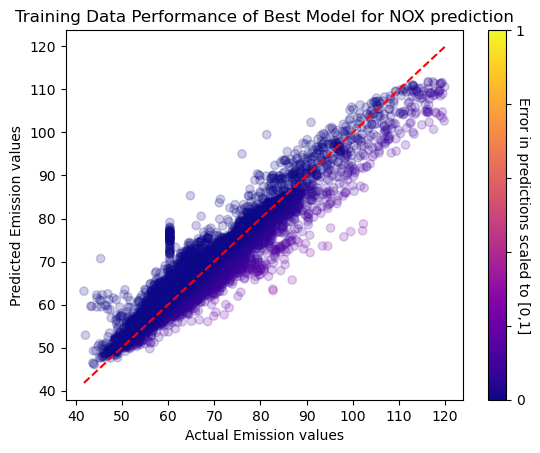

<Figure size 640x480 with 0 Axes>

In [81]:
fig = predict_plot(NOX_train_y, voting.predict(NOX_train_scaled), "Training Data Performance of Best Model for NOX prediction")
fig_save(fig, "Training Data Performance of Best Model for NOX prediction")

C:\Users\spect\AppData\Local\Temp\ipykernel_18128\564416496.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


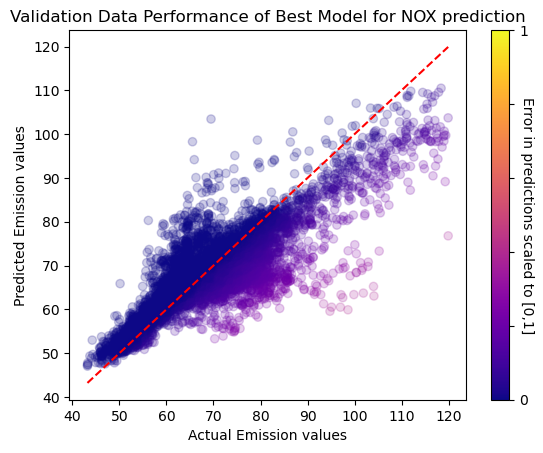

<Figure size 640x480 with 0 Axes>

In [80]:
fig = predict_plot(NOX_val_y, voting.predict(NOX_val_scaled), "Validation Data Performance of Best Model for NOX prediction")
fig_save(fig, "Validation Data Performance of Best Model for NOX prediction")

C:\Users\spect\AppData\Local\Temp\ipykernel_18128\564416496.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


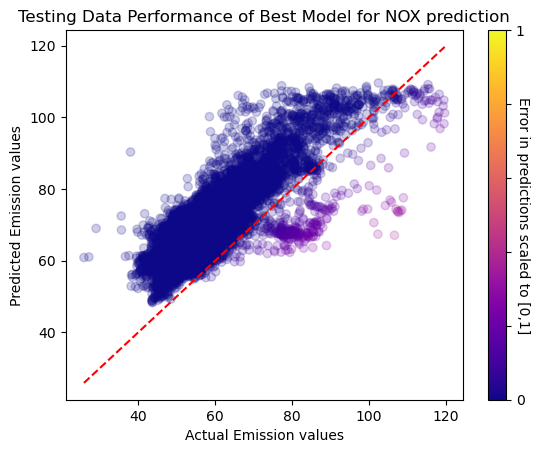

<Figure size 640x480 with 0 Axes>

In [82]:
fig = predict_plot(NOX_test_y, voting.predict(NOX_test_scaled), "Testing Data Performance of Best Model for NOX prediction")
fig_save(fig, "Testing Data Performance of Best Model for NOX prediction")